
# <span style="color:rgb(213,80,0)">Small sample comparison of different link functions</span>

This file creates Figures 2.22 \- 2.27.

## Beginning of code

In [1]:
clear
close all
% addcaption = boolean which enables to print the caption of the plots
addcaption=false;
% prin = boolean which enables to convert to eps the figures
prin=0;

% Fix bdp and find tuning constants for all estimators
bdp=0.5;

% TUKEY BIWEIGHT
psifuncTB=struct;
psifuncTB.class='TB';
c=TBbdp(bdp,1);
% kc = E(rho) = sup(rho)*bdp
kc=c^2/6*bdp;
psifuncTB.c1=c;
psifuncTB.kc1=kc;

% POWER DIVERGENCE
psifuncPD=struct;
psifuncPD.class='PD';
c1=PDbdp(bdp);
psifuncPD.c1=c1;
psifuncPD.kc1=bdp;

% HAMPEL
psifuncHA=struct;
psifuncHA.class='HA';
abc=[2;4;8];
% Compute tuning constant associated to the requested breakdown
% point
cHA=HAbdp(bdp,1,abc);
% kc = E(rho) = sup(rho)*bdp
psifuncHA.c1=cHA;
% kc = E(rho) = sup(rho)*bdp
psifuncHA.kc1=HArho(cHA*abc(3),[cHA; abc])*bdp;

% OPTIMAL
psifuncOPT=struct;
psifuncOPT.class='OPT';
cOPT=OPTbdp(bdp,1); % /3;
rhoOPTsup=OPTrho(200000,1);
psifuncOPT.c1=cOPT;
% kc = E(rho) = sup(rho)*bdp
psifuncOPT.kc1=rhoOPTsup*bdp;

% HYPERBOLIC
psifuncHYP=struct;
psifuncHYP.class='HYP';
[cHYP,A,B,d]=HYPbdp(bdp,1);

Effective tolerance in routine HYPbdp=1.6731e-07

In [2]:
k=4.5;
rhoHYPsup=HYPrho(200000,[cHYP,k,A,B,d]);
% rhoHAsup=1;
psifuncHYP.c1=[cHYP,k,A,B,d];
% kc = E(rho) = sup(rho)*bdp
psifuncHYP.kc1=rhoHYPsup*bdp;

## Create Figure 2.22

50 samples of 200 observations generated from $\mathcal{N}(5,2)$ ; no outliers. Parameter estimation with \\bd = 0.5. Upper panel: location estimate using the iterative procedure of \\eqref{eq2:itmu} with $\sigma$ estimated using MADN. Lower panel: scale estimate using the iterative procedure of equation \\eqref{eq2:itsig2} with $\mu$ = 5



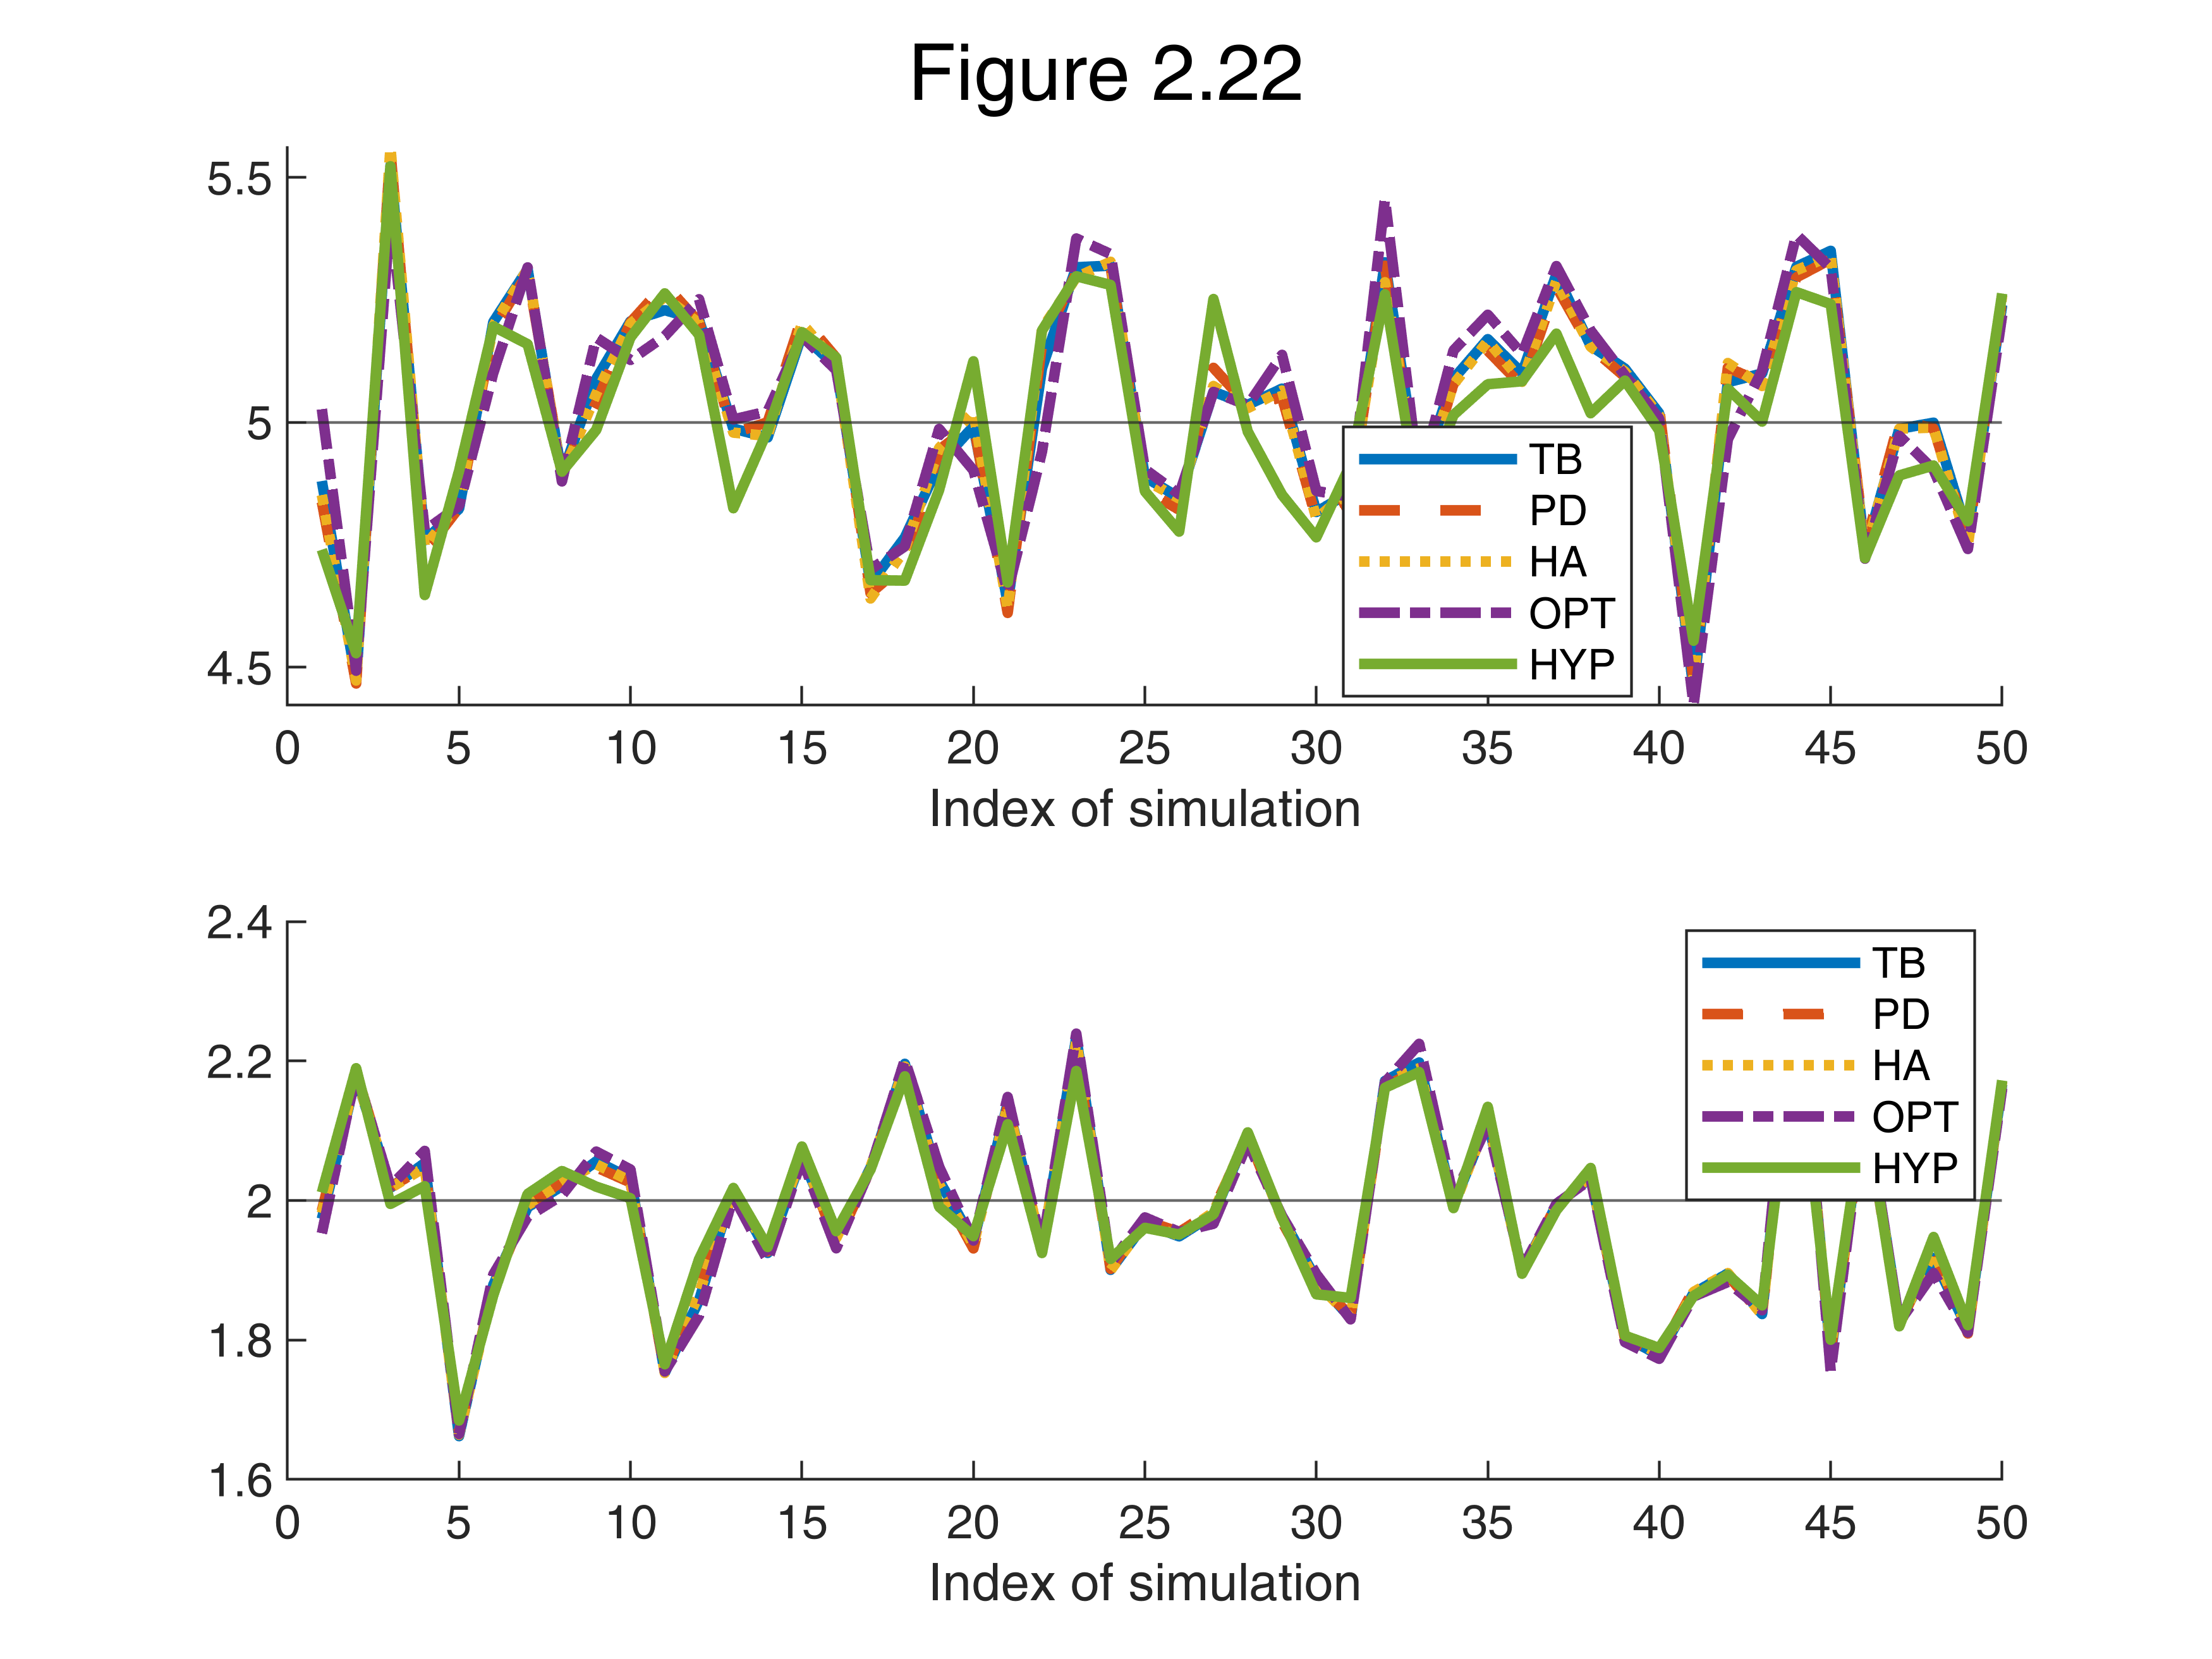

In [3]:
% truescale = true value of scale from DGP
truescale=2;
% trueloc = true value of location from DGP
trueloc=5;

% usetruescale = boolean which specifies whether to use or not true
% estimate of scale in the iterative estimation loop
usetruescale=0;
% shiftcontamination = boolean if true a proportion equal to
% fraccontamination of the observations are shifted by an amount determined
% by variable shift else we use point mass contamination and
% fraccontamination are replaced by shift
shiftcontamination =0;
% fraccontamination = fraction of units which has been contaminated.
fraccontamination=0;
% shift = amount of shitft to apply or value of pointmass contamination
shift=10;
% n = sample size
n=200;
rng(1000)
% nsimul  = number of simulations
nsimul=50;
Loc=zeros(nsimul,5);

for j=1:nsimul

    u=truescale*randn(n,1)+trueloc;
    n1=round(n*fraccontamination);

    if shiftcontamination ==true
        % shift contamination
        u(1:n1)=u(1:n1)+shift;
    else
        % point mass contamination
        u(1:n1)=shift;
    end

    if usetruescale ==true
        mTB=Mlocation(u,psifuncTB,truescale);
        mPD=Mlocation(u,psifuncPD,truescale);
        mHA=Mlocation(u,psifuncHA,truescale);
        mOPT=Mlocation(u,psifuncOPT,truescale);
        mHYP=Mlocation(u,psifuncHYP,truescale);
    else
        mTB=Mlocation(u,psifuncTB);
        mPD=Mlocation(u,psifuncPD);
        mHA=Mlocation(u,psifuncHA);
        mOPT=Mlocation(u,psifuncOPT);
        mHYP=Mlocation(u,psifuncHYP);
    end

    % disp([s sPD])
    Loc(j,:)=[mTB mPD mHA mOPT mHYP];
end

fig=figure;
set(fig,'defaultLegendAutoUpdate','off');
subplot(2,1,1)
hold('on')

% Loc=sortrows(Loc,1);
ls={'-' '--' ':' '-.' '-'};
for i=1:5
    plot(1:nsimul,Loc(:,i),ls{i},'LineWidth',2)
end
yline(trueloc)

legend(["TB" "PD" "HA" "OPT" "HYP"],'Location','best')
xlabel('Index of simulation')

if addcaption ==true
    if fraccontamination==0
        title(['Loc est n=' num2str(n) ' fraccont=' num2str(fraccontamination) ' usetruescale=' num2str(usetruescale)])
    else
        title(['Loc est n=' num2str(n) ' fraccont=' num2str(fraccontamination), ' shiftcont=' num2str(shiftcontamination) ...
            ' shift=' num2str(shift) ' usetruescale=' num2str(usetruescale)])
    end
end

%  estimate of scale
trueloc=0;

VV=zeros(nsimul,5);

for j=1:nsimul

    u=truescale*randn(n,1)+trueloc;
    n1=round(n*fraccontamination);

    if shiftcontamination ==true
        % shift contamination
        u(1:n1)=u(1:n1)+shift;
    else
        % point mass contamination
        u(1:n1)=shift; % ^10;
    end

    sTB=Mscale(u,psifuncTB);
    sPD=Mscale(u,psifuncPD);
    sHA=Mscale(u,psifuncHA);
    sOPT=Mscale(u,psifuncOPT);
    sHYP=Mscale(u,psifuncHYP);

    VV(j,:)=[sTB sPD sHA sOPT sHYP];
end

subplot(2,1,2)
hold('on')
ls={'-' '--' ':' '-.' '-'};
for i=1:5
    plot(1:nsimul,VV(:,i),ls{i},'LineWidth',2)
end

legend(["TB" "PD" "HA" "OPT" "HYP"],'Location','best')
yline(truescale)
xlabel('Index of simulation')
if addcaption ==true
    if fraccontamination==0
        title(['Scale est n=' num2str(n) ' fraccont=' num2str(fraccontamination)])
    else
        title([' Scale est n=' num2str(n) ' fraccont=' num2str(fraccontamination), ' shiftcont=' num2str(shiftcontamination) ...
            ' shift=' num2str(shift)])
    end

end

if prin==1
    % print to postscript
    print -depsc rhobdp0.eps;
else
    sgtitle('Figure 2.22')
    set(gcf,"Name",'Figure 2.22')
end

## Create Figure 2.23

Difference between point mass and shift contamination 200 samples of 200 observations generated from $\mathcal{N}(5,2)$ . 30 per cent contamination. Estimates of scale as in Figure~\\ref{cap2:rhobdp0}. Ordering based on the estimates of location using Tukey's biweight. Upper panel; shift contamination with a value of 10. Lower panel; point mass contamination of 10} \\label{cap2:rhoPMLS}



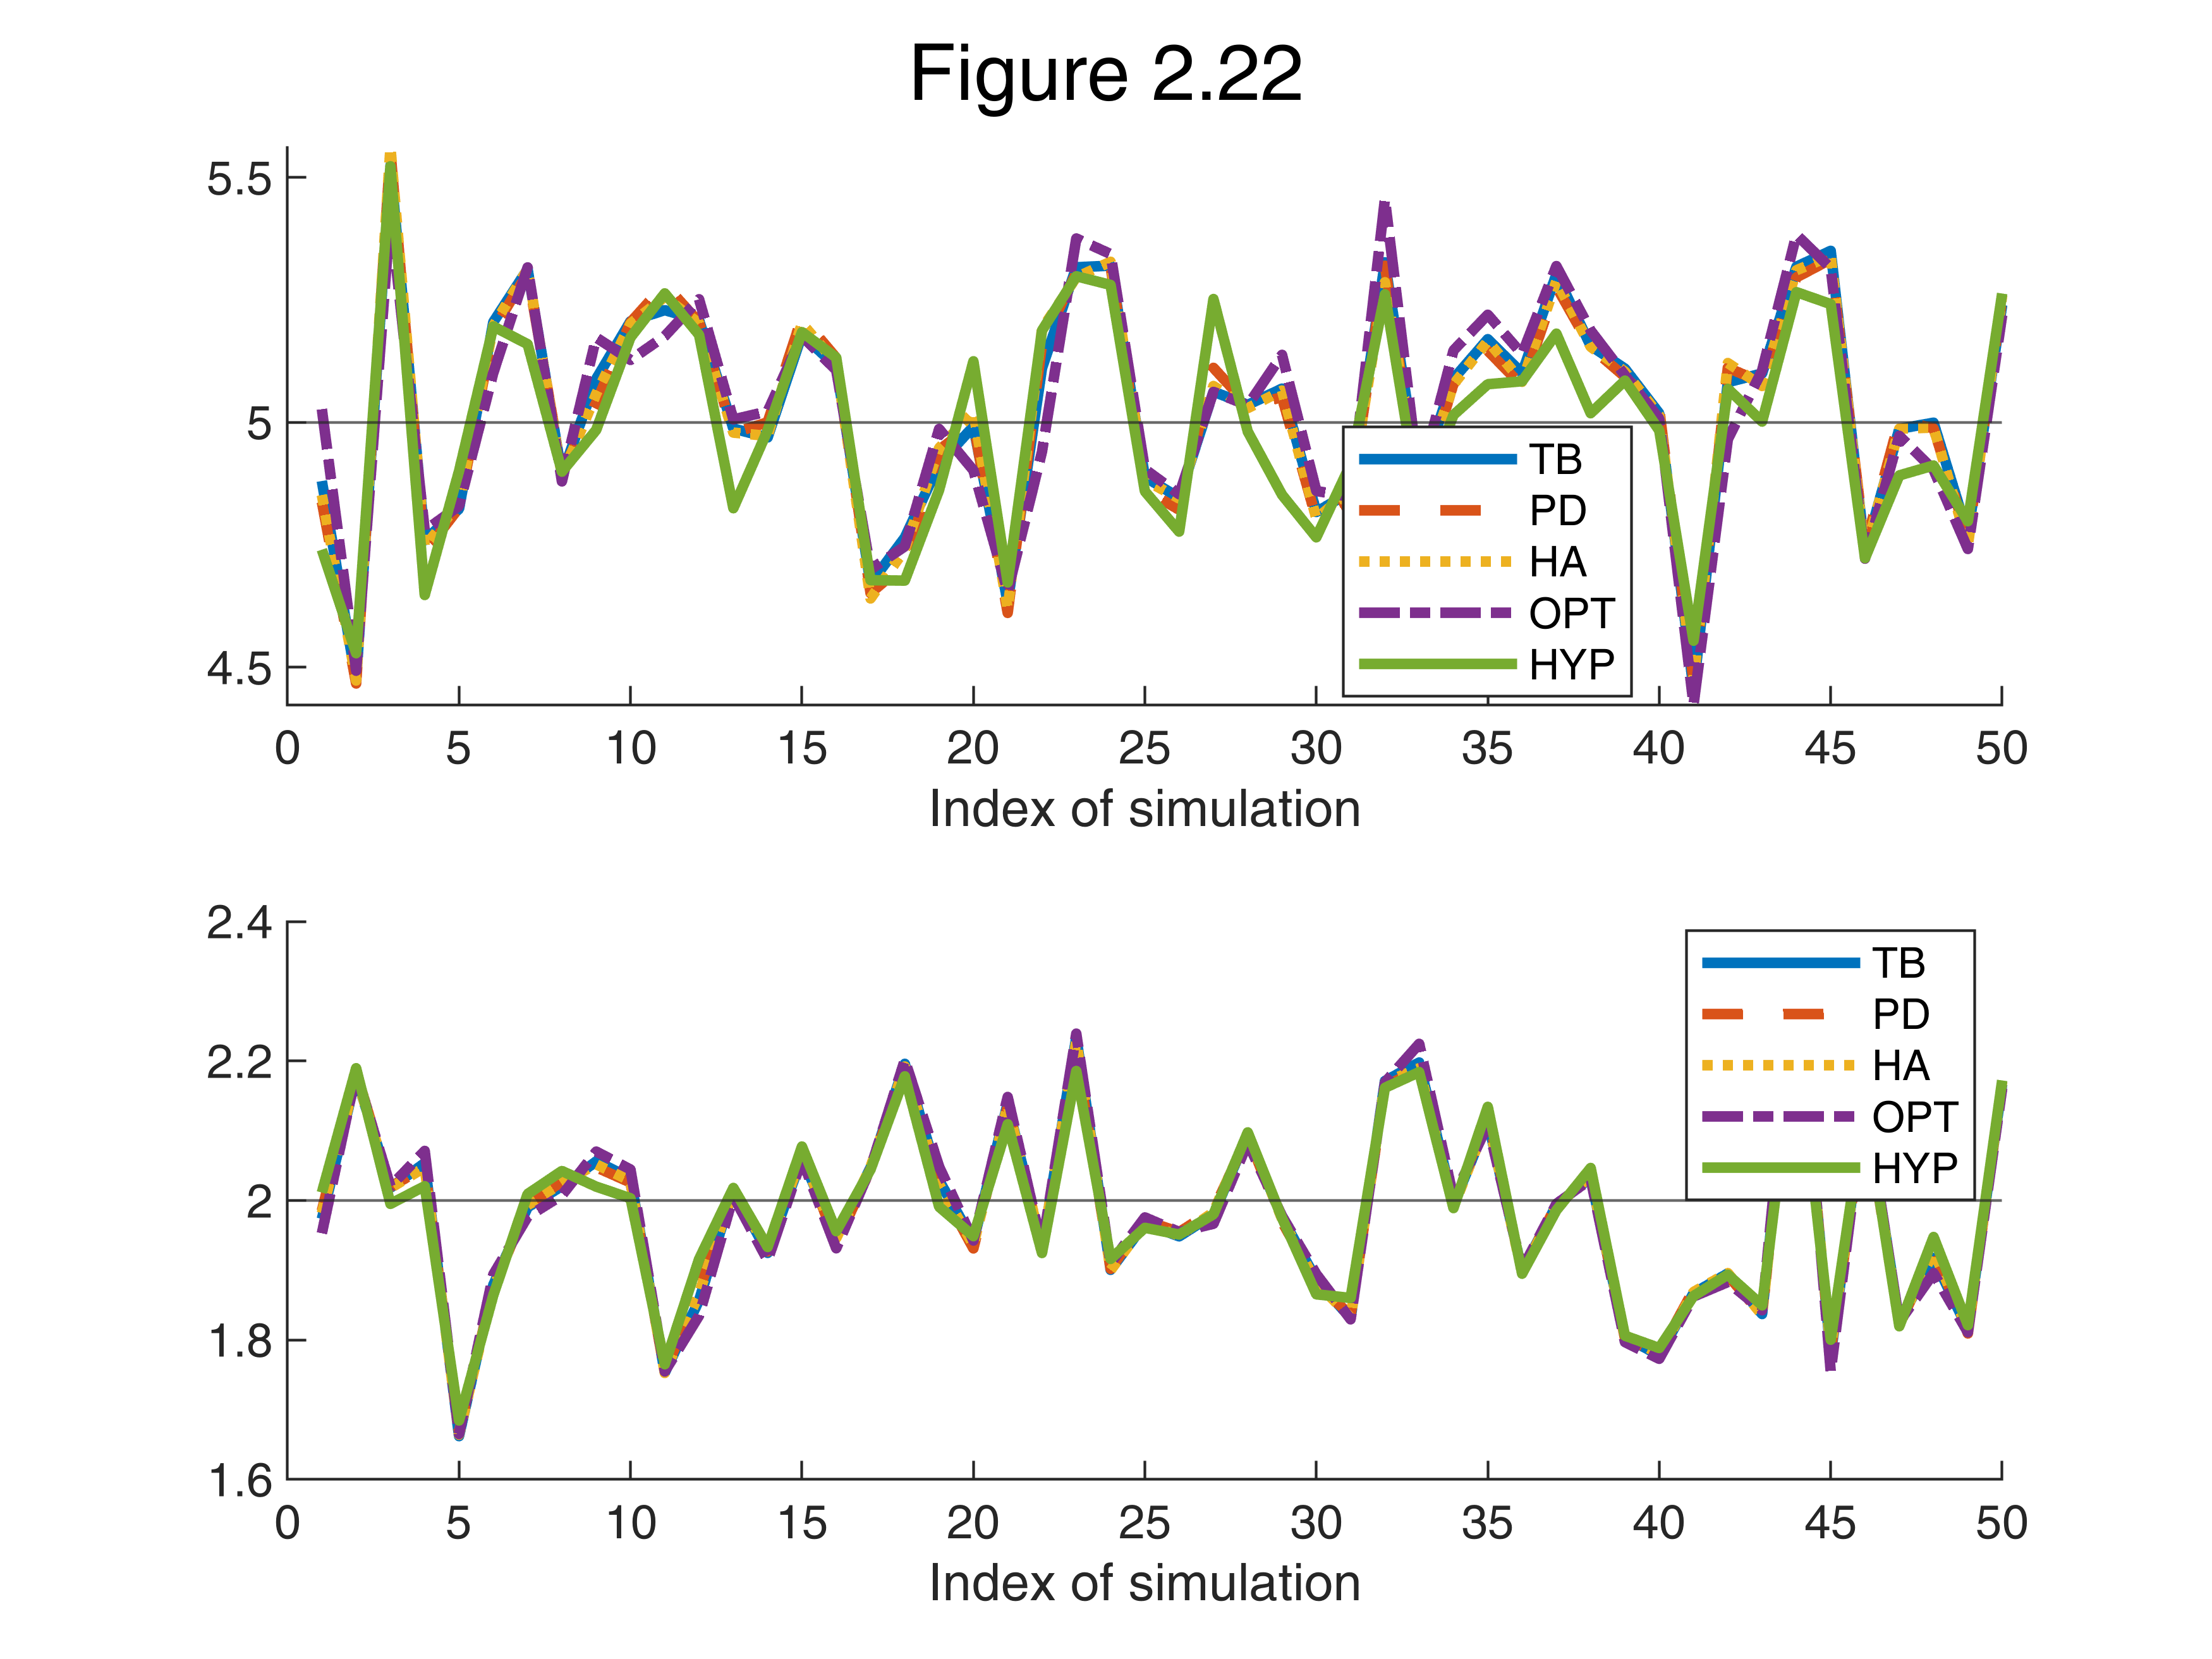

In [4]:
truescale=2;
trueloc=5;
usetruescale=0;
fraccontamination=0.3;
shift=10;
n=200;
rng(1000)
nsimul=200;

shiftcontamination =1;
subplot(2,1,1)


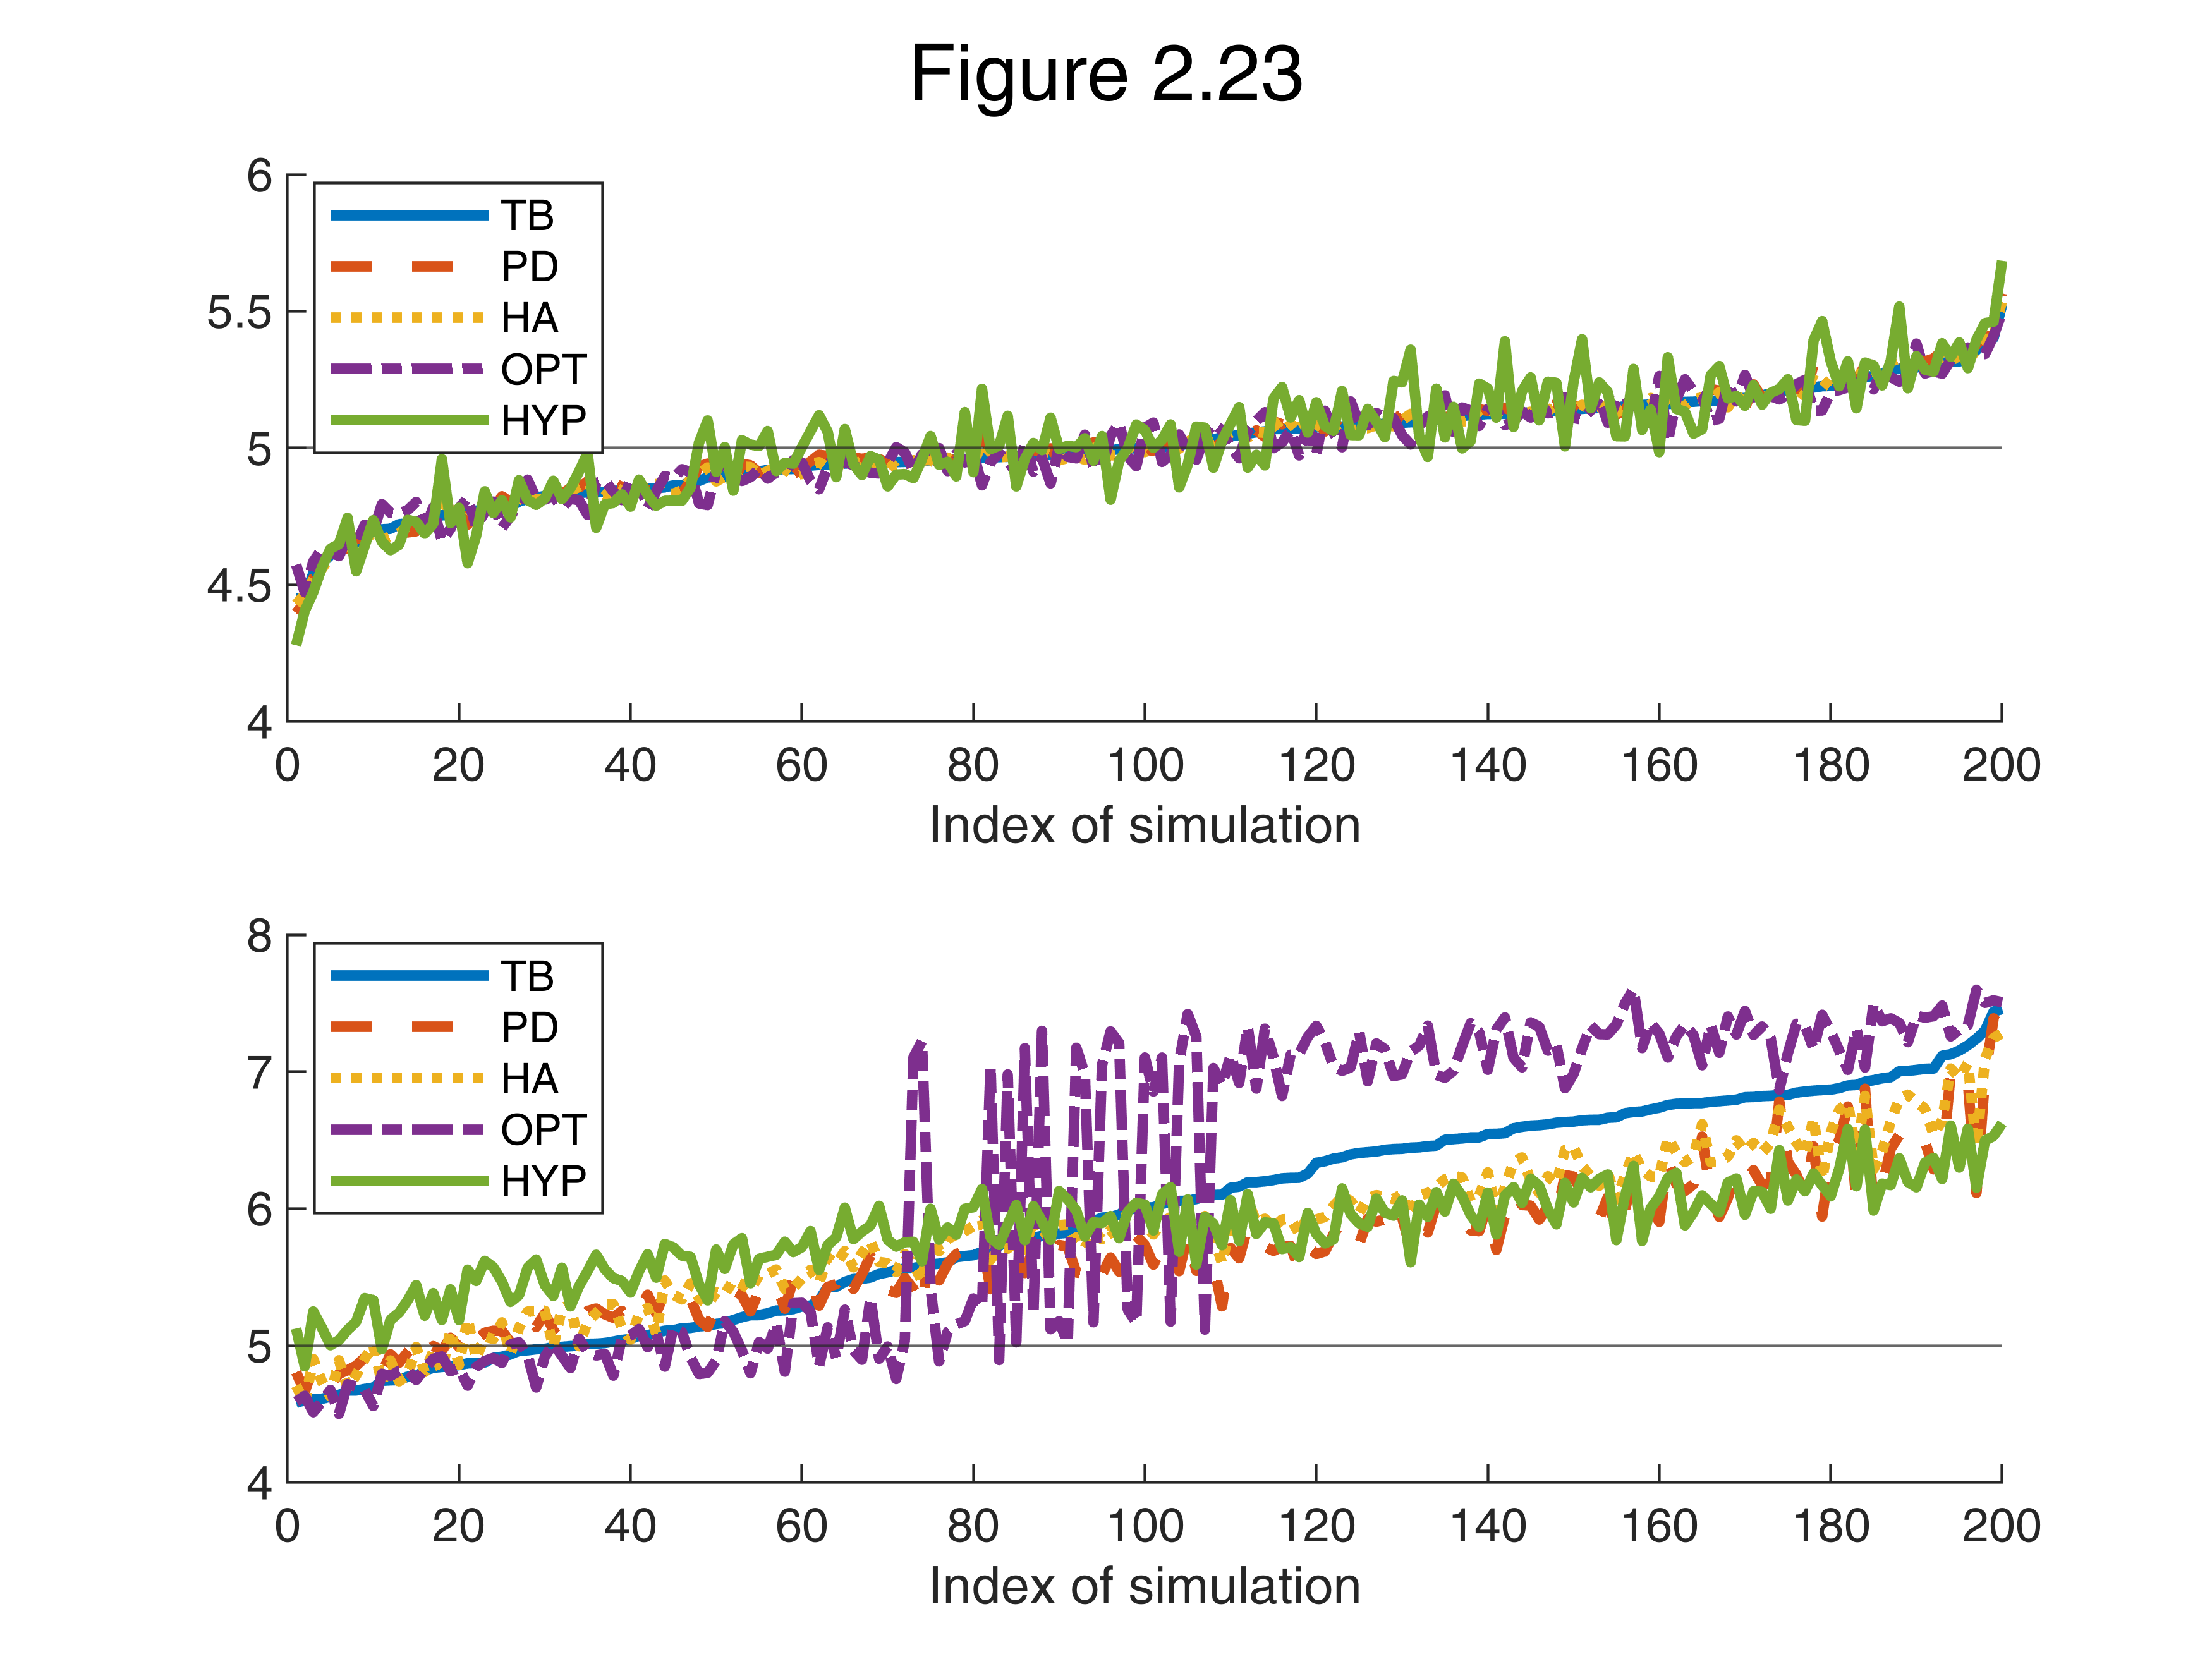

In [5]:

Loc=zeros(nsimul,5);

for j=1:nsimul

    u=truescale*randn(n,1)+trueloc;
    n1=round(n*fraccontamination);

    if shiftcontamination ==true
        % shift contamination
        u(1:n1)=u(1:n1)+shift;
    else
        % point mass contamination
        u(1:n1)=shift;
    end

    if usetruescale ==true
        mTB=Mlocation(u,psifuncTB,truescale);
        mPD=Mlocation(u,psifuncPD,truescale);
        mHA=Mlocation(u,psifuncHA,truescale);
        mOPT=Mlocation(u,psifuncOPT,truescale);
        mHYP=Mlocation(u,psifuncHYP,truescale);
    else
        mTB=Mlocation(u,psifuncTB);
        mPD=Mlocation(u,psifuncPD);
        mHA=Mlocation(u,psifuncHA);
        mOPT=Mlocation(u,psifuncOPT);
        mHYP=Mlocation(u,psifuncHYP);
    end

    % disp([s sPD])
    Loc(j,:)=[mTB mPD mHA mOPT mHYP];
end

figure
subplot(2,1,1)
hold('on')
% Order rows using TB
Loc=sortrows(Loc,1);
ls={'-' '--' ':' '-.' '-'};
for i=1:5
    plot(1:nsimul,Loc(:,i),ls{i},'LineWidth',2)
end
yline(trueloc)

legend(["TB" "PD" "HA" "OPT" "HYP"],'Location','best')
xlabel('Index of simulation')
if addcaption ==true
    if fraccontamination==0
        title(['n=' num2str(n) ' fraccont=' num2str(fraccontamination) ' usetruescale=' num2str(usetruescale)])
    else
        title(['n=' num2str(n) ' fraccont=' num2str(fraccontamination), ' shiftcont=' num2str(shiftcontamination) ...
            ' shift=' num2str(shift) ' usetruescale=' num2str(usetruescale)])
    end
end

% now we  repeat with point wise contamination
shiftcontamination =0;
subplot(2,1,2)

Loc=zeros(nsimul,5);

for j=1:nsimul

    u=truescale*randn(n,1)+trueloc;
    n1=round(n*fraccontamination);

    if shiftcontamination ==true
        % shift contamination
        u(1:n1)=u(1:n1)+shift;
    else
        % point mass contamination
        u(1:n1)=shift;
    end

    if usetruescale ==true
        mTB=Mlocation(u,psifuncTB,truescale);
        mPD=Mlocation(u,psifuncPD,truescale);
        mHA=Mlocation(u,psifuncHA,truescale);
        mOPT=Mlocation(u,psifuncOPT,truescale);
        mHYP=Mlocation(u,psifuncHYP,truescale);
    else
        mTB=Mlocation(u,psifuncTB);
        mPD=Mlocation(u,psifuncPD);
        mHA=Mlocation(u,psifuncHA);
        mOPT=Mlocation(u,psifuncOPT);
        mHYP=Mlocation(u,psifuncHYP);
    end

    % disp([s sPD])
    Loc(j,:)=[mTB mPD mHA mOPT mHYP];
end

hold('on')
Loc=sortrows(Loc,1);
ls={'-' '--' ':' '-.' '-'};
for i=1:5
    plot(1:nsimul,Loc(:,i),ls{i},'LineWidth',2)
end
yline(trueloc)

legend(["TB" "PD" "HA" "OPT" "HYP"],'Location','best')
xlabel('Index of simulation')

if addcaption ==true
    if fraccontamination==0
        title(['n=' num2str(n) ' fraccont=' num2str(fraccontamination) ' usetruescale=' num2str(usetruescale)])
    else
        title(['n=' num2str(n) ' fraccont=' num2str(fraccontamination), ' shiftcont=' num2str(shiftcontamination) ...
            ' shift=' num2str(shift) ' usetruescale=' num2str(usetruescale)])
    end
end

if prin==1
    % print to postscript
    print -depsc rhoPMLS.eps;
else
    sgtitle('Figure 2.23')
    set(gcf,"Name",'Figure 2.23')
end

## Create Figure 2.24

Differences between using or not true scale 200 samples of 200 observations generated from $\mathcal{N}(5,2)$ . 30 per cent shift contamination. Boxplots of location estimates as in Figure~\\ref{cap2:rhobdp0}. Left\-hand panel:  $\sigma$ = 2. Right\-hand panel: $\sigma$ estimated with MADN



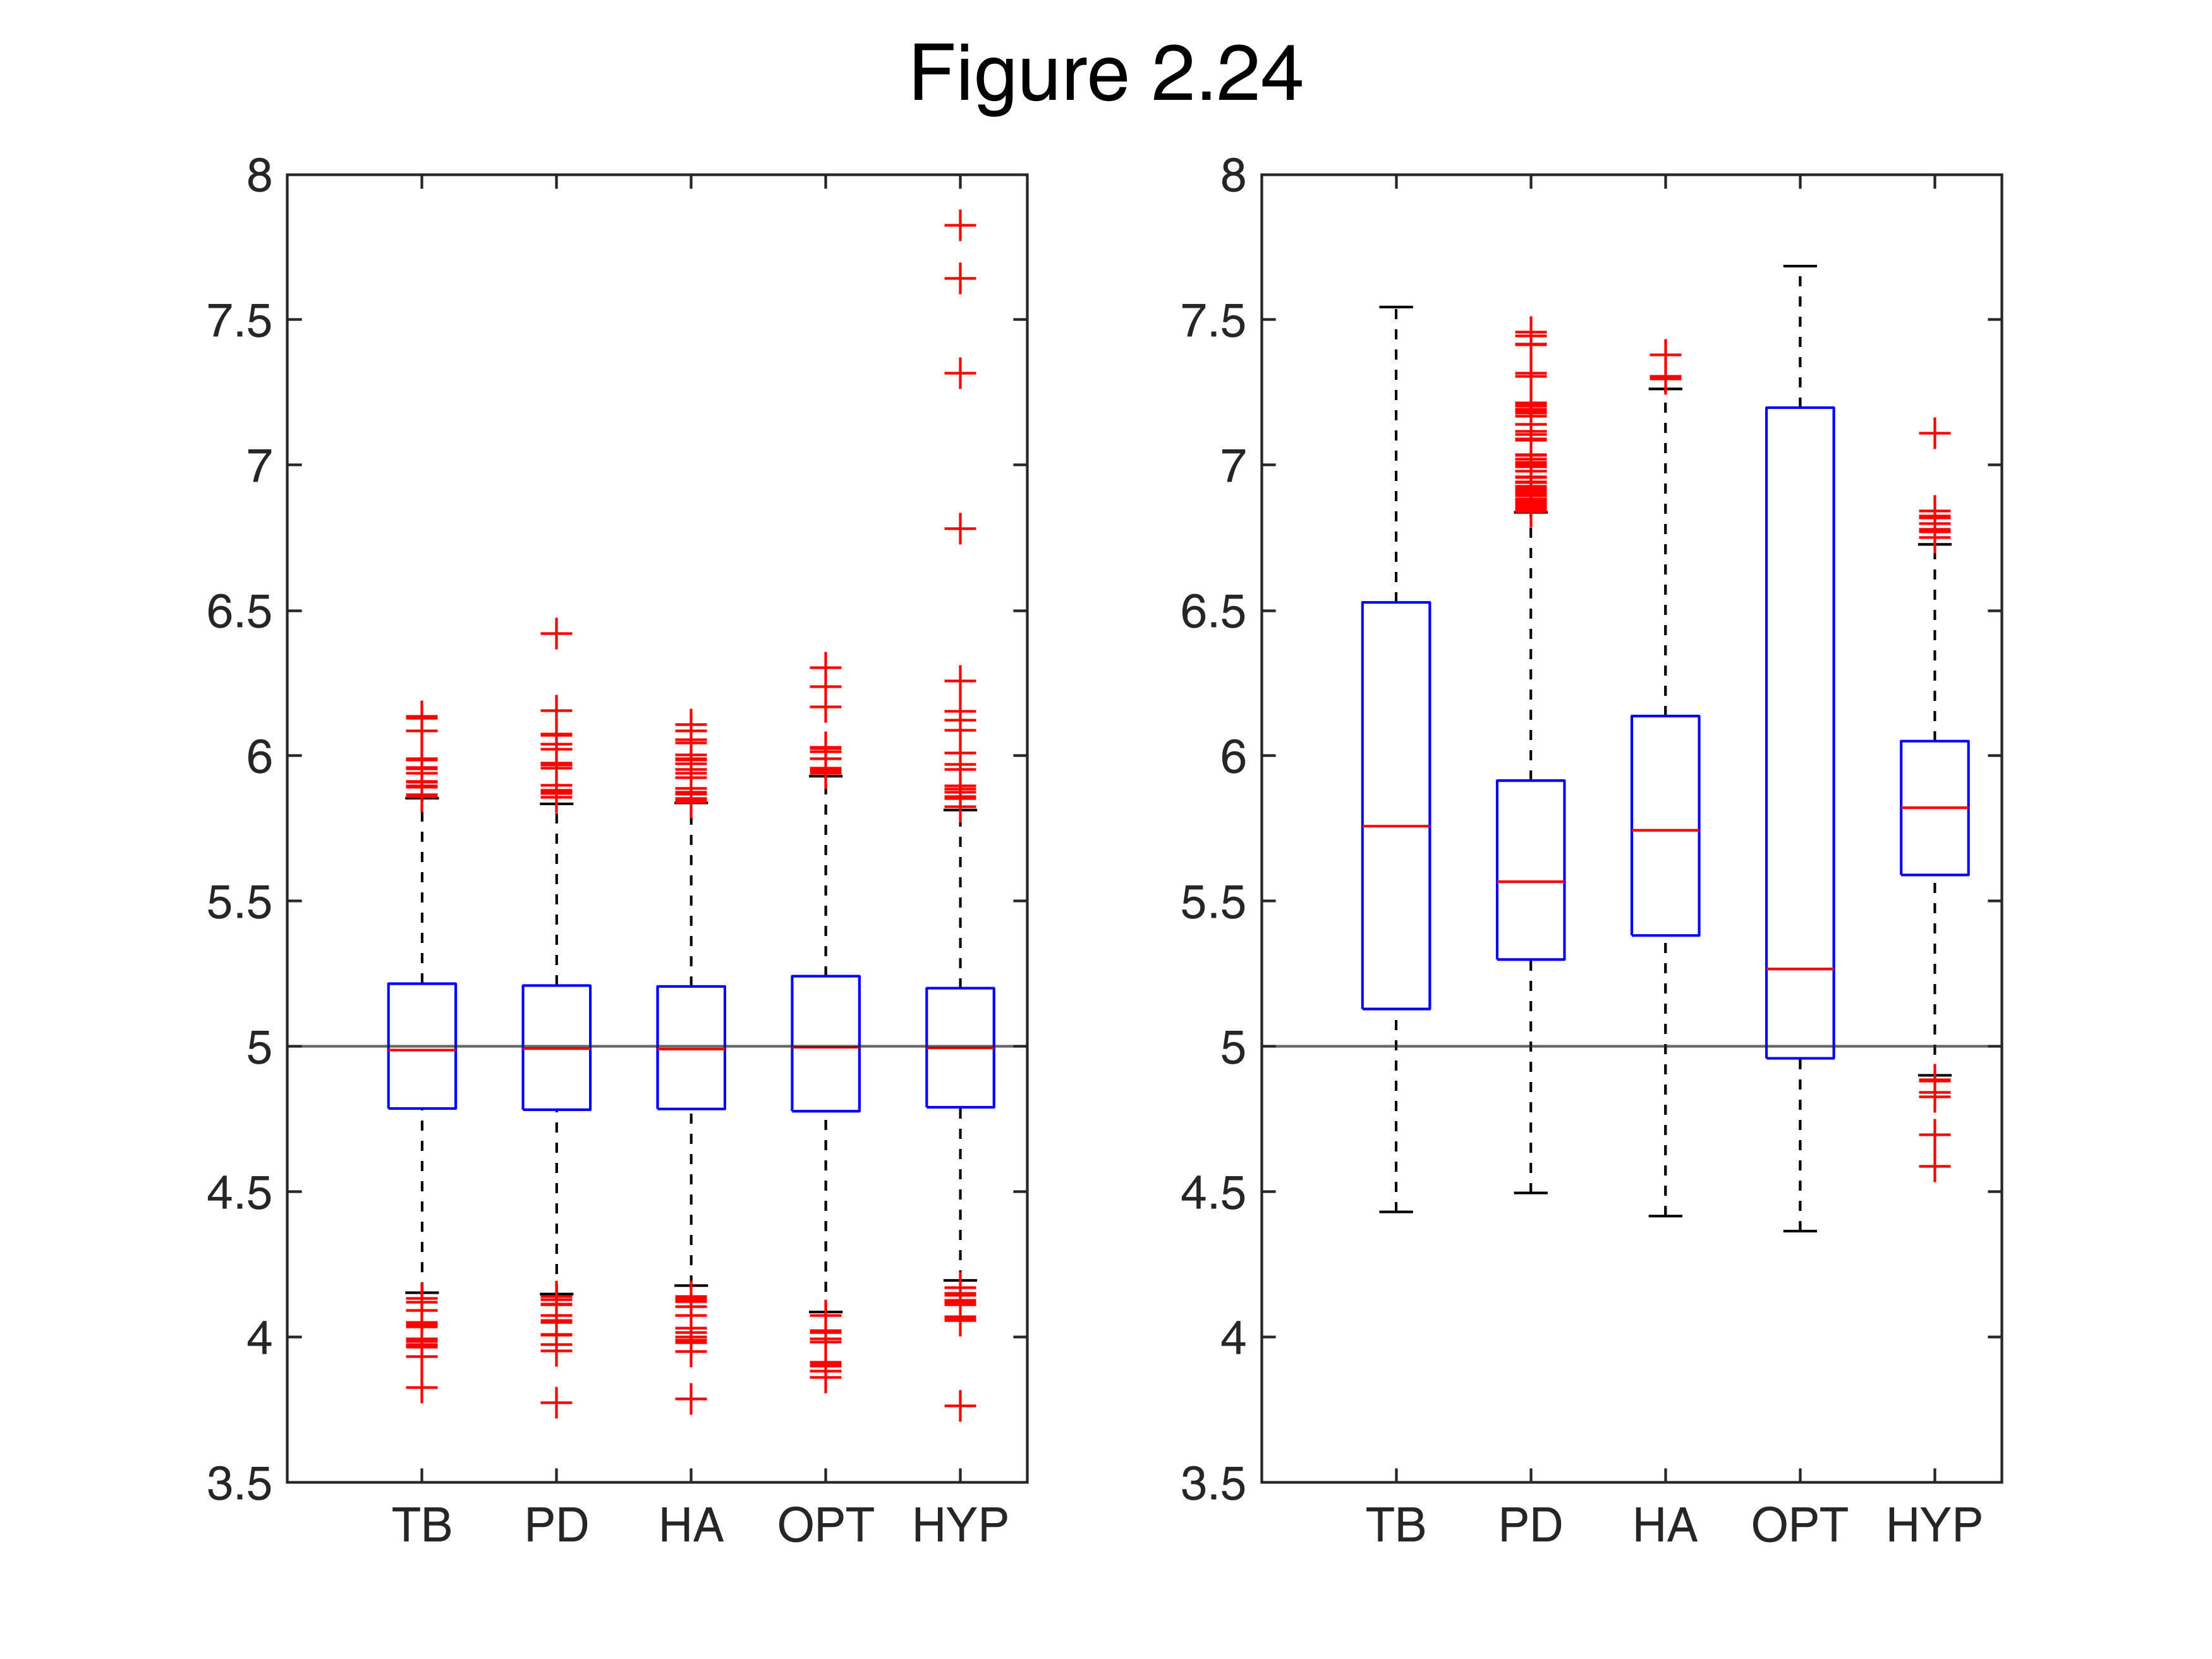

In [6]:
truescale=2;
trueloc=5;
shiftcontamination =0;
fraccontamination=0.30;
shift=10;
n=200;
rng(1000)
nsimul=2000;
yl1=3.5;
yl2=8;
Loc=zeros(nsimul,5);
usetruescale=1;
% if useboxplot is true results from simulations are shown using boxplots
useboxplot=1;

for j=1:nsimul

    u=truescale*randn(n,1)+trueloc;
    n1=round(n*fraccontamination);

    if shiftcontamination ==true
        % shift contamination
        u(1:n1)=u(1:n1)+shift;
    else
        % point mass contamination
        u(1:n1)=shift;
    end

    if usetruescale ==true
        mTB=Mlocation(u,psifuncTB,truescale);
        mPD=Mlocation(u,psifuncPD,truescale);
        mHA=Mlocation(u,psifuncHA,truescale);
        mOPT=Mlocation(u,psifuncOPT,truescale);
        mHYP=Mlocation(u,psifuncHYP,truescale);
    else
        mTB=Mlocation(u,psifuncTB);
        mPD=Mlocation(u,psifuncPD);
        mHA=Mlocation(u,psifuncHA);
        mOPT=Mlocation(u,psifuncOPT);
        mHYP=Mlocation(u,psifuncHYP);
    end

    Loc(j,:)=[mTB mPD mHA mOPT mHYP];
end

fig=figure;
set(fig,'defaultLegendAutoUpdate','off');
subplot(1,2,1)
hold('on')

if useboxplot==true
    boxplot(Loc,'Labels',["TB" "PD" "HA" "OPT" "HYP"])
else
    ls={'-' '--' ':' '-.' '-'};
    for i=1:5
        plot(1:nsimul,Loc(:,i),ls{i},'LineWidth',2)
    end
    yline(trueloc)

    legend(["TB" "PD" "HA" "OPT" "HYP"],'Location','best')
    xlabel('Index of simulation')
end

if addcaption == true

    if fraccontamination==0
        title(['n=' num2str(n) ' fraccont=' num2str(fraccontamination) ' usetruescale=' num2str(usetruescale)])
    else
        title(['n=' num2str(n) ' fraccont=' num2str(fraccontamination), ' shiftcont=' num2str(shiftcontamination) ...
            ' shift=' num2str(shift) ' usetruescale=' num2str(usetruescale)])
    end
end
ylim([yl1 yl2])
yline(trueloc)

subplot(1,2,2)
hold('on')
Loc=zeros(nsimul,5);
usetruescale=0;

for j=1:nsimul

    u=truescale*randn(n,1)+trueloc;
    n1=round(n*fraccontamination);

    if shiftcontamination ==true
        % shift contamination
        u(1:n1)=u(1:n1)+shift;
    else
        % point mass contamination
        u(1:n1)=shift;
    end

    if usetruescale ==true
        mTB=Mlocation(u,psifuncTB,truescale);
        mPD=Mlocation(u,psifuncPD,truescale);
        mHA=Mlocation(u,psifuncHA,truescale);
        mOPT=Mlocation(u,psifuncOPT,truescale);
        mHYP=Mlocation(u,psifuncHYP,truescale);
    else
        mTB=Mlocation(u,psifuncTB);
        mPD=Mlocation(u,psifuncPD);
        mHA=Mlocation(u,psifuncHA);
        mOPT=Mlocation(u,psifuncOPT);
        mHYP=Mlocation(u,psifuncHYP);
    end

    Loc(j,:)=[mTB mPD mHA mOPT mHYP];
end

if useboxplot==true
    boxplot(Loc,'Labels',["TB" "PD" "HA" "OPT" "HYP"])
else
    ls={'-' '--' ':' '-.' '-'};
    for i=1:5
        plot(1:nsimul,Loc(:,i),ls{i},'LineWidth',2)
    end
    yline(trueloc)

    legend(["TB" "PD" "HA" "OPT" "HYP"],'Location','best')
    xlabel('Index of simulation')

end

if addcaption == true
    if fraccontamination==0
        title(['n=' num2str(n) ' fraccont=' num2str(fraccontamination) ' usetruescale=' num2str(usetruescale)])
    else
        title(['n=' num2str(n) ' fraccont=' num2str(fraccontamination), ' shiftcont=' num2str(shiftcontamination) ...
            ' shift=' num2str(shift) ' usetruescale=' num2str(usetruescale)])
    end
end
ylim([yl1 yl2])

yline(trueloc)
if prin==1
    % print to postscript
    print -depsc rhoUsetruesigma.eps;
else
    sgtitle('Figure 2.24')
    set(gcf,"Name",'Figure 2.24')
end

## Create Figure 2.25

Simultaneous estimation of mu and sigma All the tuning constants set for bdp=0.5



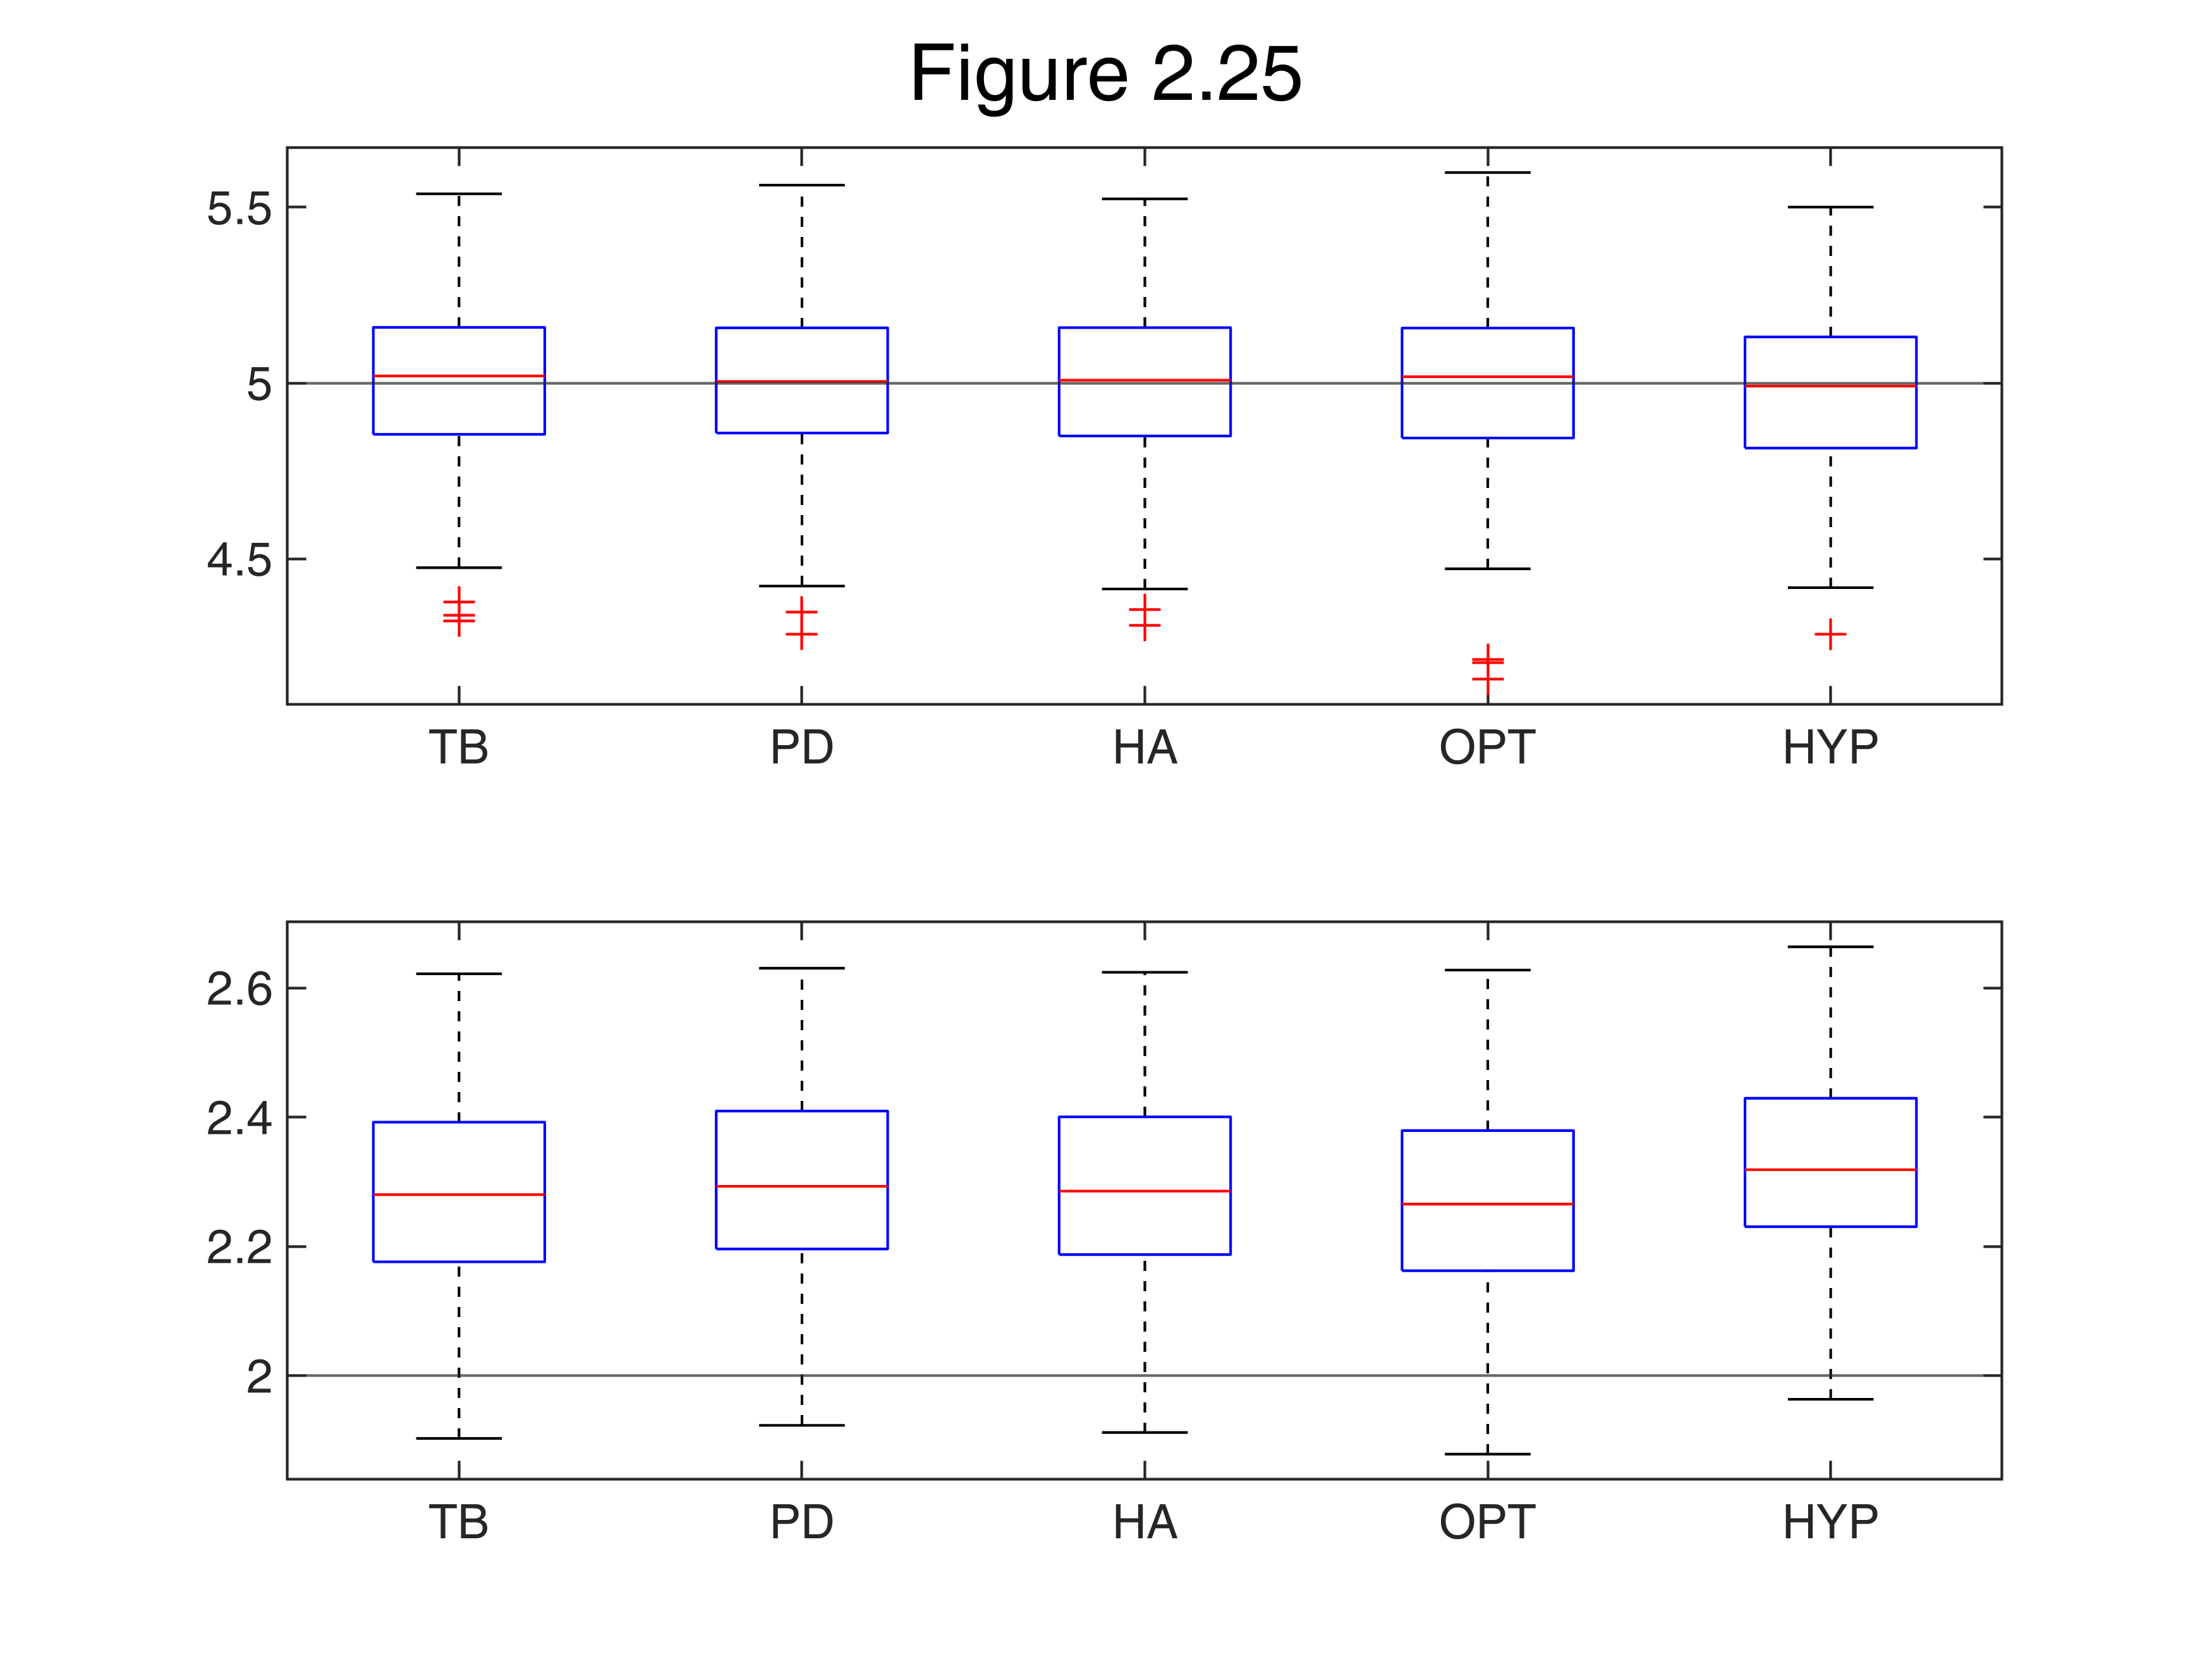

In [7]:
% Simulation study
% 200 samples of 200 observations generated from $\mathcal{N}(5,2)$ . 10 per
% cent  shift contamination, \bd $=0.2$ .  Simultaneous estimation of $\mu$
% and $\sigma$ as in Figure~\ref{cap2:rhoSimEstbdp05}. Upper panel:
% boxplots of the estimates of location. Lower panel: boxplots of the
% estimates of scale
nsimul=200;
Loc=zeros(nsimul,5);
Sca=zeros(nsimul,5);
trueloc=5;
truescale=2;

shiftcontamination =0;
fraccontamination=0.1;
shift=50;
n=200;
rng(1000)

for j=1:nsimul

    u=truescale*randn(n,1)+trueloc;
    n1=round(n*fraccontamination);

    if shiftcontamination ==true
        % shift contamination
        u(1:n1)=u(1:n1)+shift;
    else
        % point mass contamination
        u(1:n1)=shift;
    end

    mTB=Mlocsca(u,psifuncTB);

    mPD=Mlocsca(u,psifuncPD);

    mHA=Mlocsca(u,psifuncHA);

    mOPT=Mlocsca(u,psifuncOPT);

    mHYP=Mlocsca(u,psifuncHYP);

    Loc(j,:)=[mTB.location mPD.location mHA.location mOPT.location mHYP.location];
    Sca(j,:)=[mTB.scale mPD.scale mHA.scale mOPT.scale mHYP.scale];

end
figure
subplot(2,1,1)

boxplot(Loc,'Labels',["TB" "PD" "HA" "OPT" "HYP"])

yline(trueloc)

if addcaption==true
    if fraccontamination==0
        title(['bdp=' num2str(bdp) ' Estimate of loc. n=' num2str(n) ' fraccont=' num2str(fraccontamination)])
    else
        title(['bdp=' num2str(bdp) ' Estimate of loc. n=' num2str(n) ' fraccont=' num2str(fraccontamination), ' shiftcont=' num2str(shiftcontamination) ...
            ' shift=' num2str(shift)])
    end
end

subplot(2,1,2)
boxplot(Sca,'Labels',["TB" "PD" "HA" "OPT" "HYP"])

yline(truescale)

if addcaption==true
    if fraccontamination==0
        title(['bdp=' num2str(bdp) ' Estimate of scale. n=' num2str(n) ' fraccont=' num2str(fraccontamination)])
    else
        title(['bdp=' num2str(bdp) ' Estimate of scale. n=' num2str(n) ' fraccont=' num2str(fraccontamination), ' shiftcont=' num2str(shiftcontamination) ...
            ' shift=' num2str(shift) ])
    end
end

if prin==1
    % print to postscript
    print -depsc rhoSimEstbdp05.eps;
else
    sgtitle('Figure 2.25')
    set(gcf,"Name",'Figure 2.25')
end

## Create Figure 2.26

Now repeat using bdp=0.2 200 samples of 200 observations generated from $\mathcal{N}(5,2)$ . 10 per cent shift contamination, \\bd\$=0.2\$. Simultaneous estimation of $\mu$ and $\sigma$ as in Figure~\\ref{cap2:rhoSimEstbdp05}. Upper panel: boxplots of the estimates of location. Lower panel: boxplots of the estimates of scale



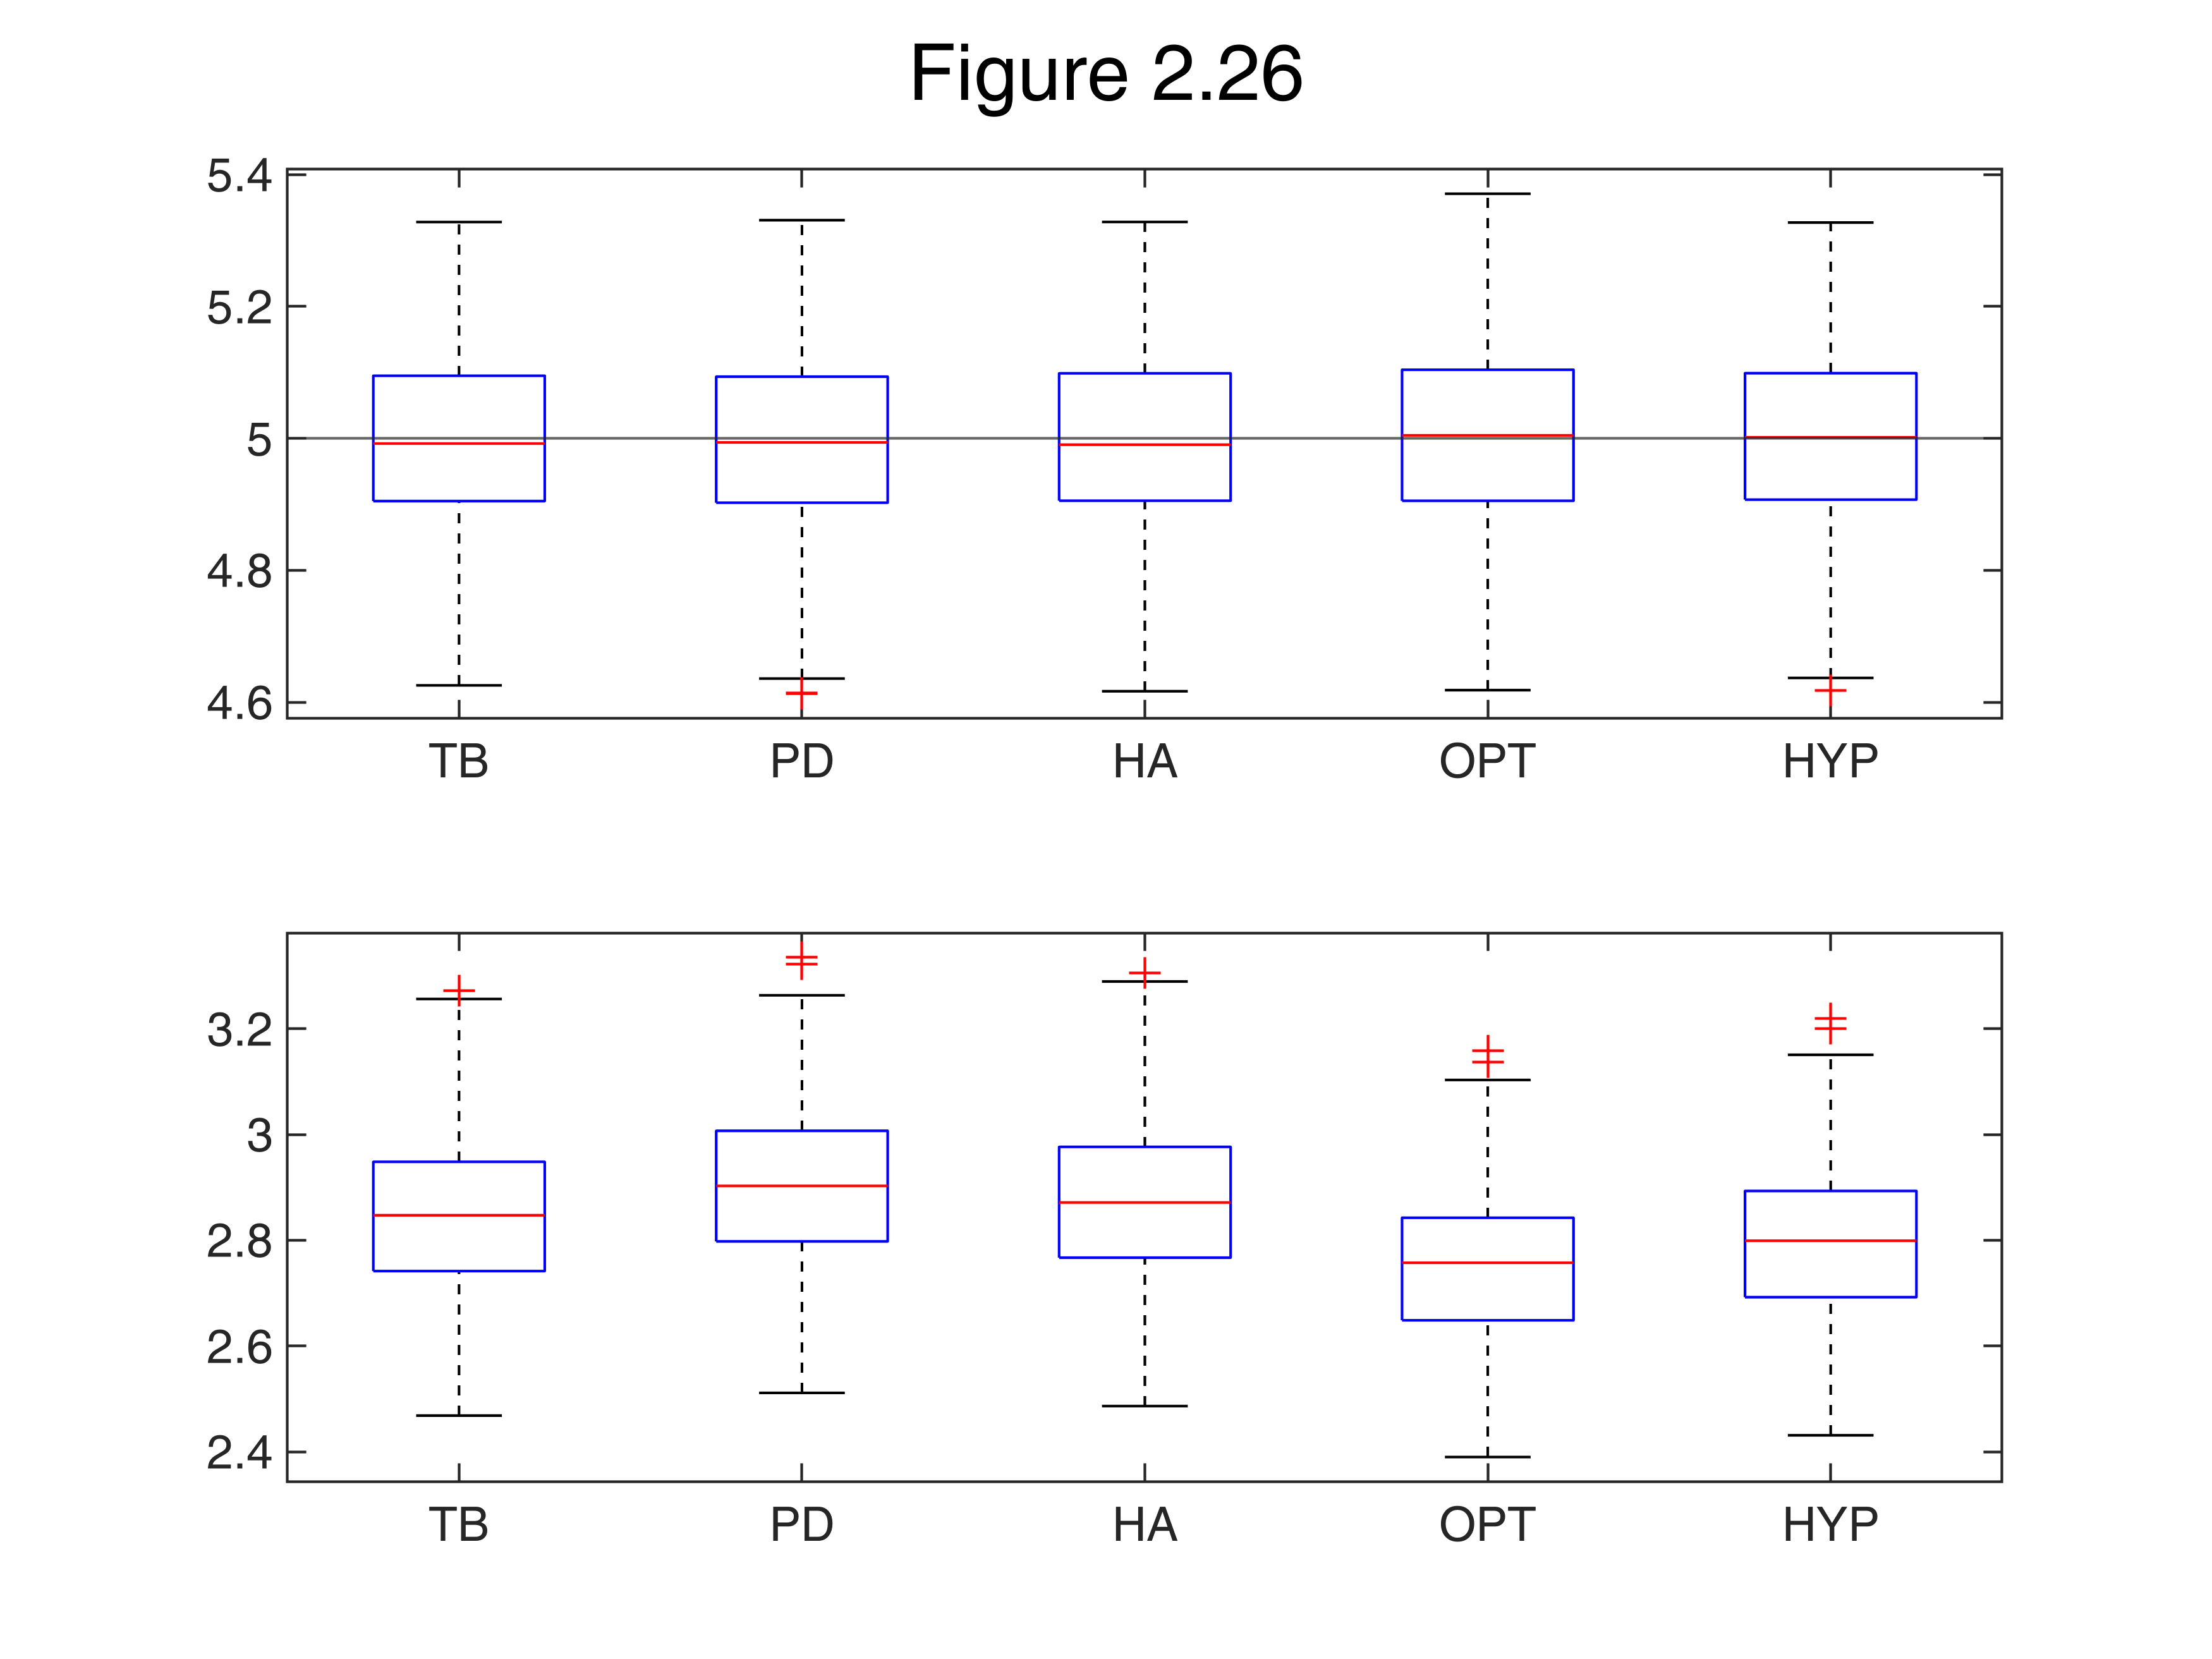

In [8]:
bdp=0.2;
psifuncTB=struct;
psifuncTB.class='TB';
c=TBbdp(bdp,1);
% kc = E(rho) = sup(rho)*bdp
kc=c^2/6*bdp;
psifuncTB.c1=c;
psifuncTB.kc1=kc;

psifuncPD=struct;
psifuncPD.class='PD';
c1=PDbdp(bdp);
psifuncPD.c1=c1;
psifuncPD.kc1=bdp;

psifuncHA=struct;
psifuncHA.class='HA';
abc=[2;4;8];
% Compute tuning constant associated to the requested breakdown
% point
cHA=HAbdp(bdp,1,abc);
% kc = E(rho) = sup(rho)*bdp
psifuncHA.c1=cHA;
% kc = E(rho) = sup(rho)*bdp
psifuncHA.kc1=HArho(cHA*abc(3),[cHA; abc])*bdp;

psifuncOPT=struct;
psifuncOPT.class='OPT';
cOPT=OPTbdp(bdp,1); % /3;
rhoOPTsup=OPTrho(200000,1);
% rhoHAsup=1;
psifuncOPT.c1=cOPT;
% kc = E(rho) = sup(rho)*bdp
psifuncOPT.kc1=rhoOPTsup*bdp;

psifuncHYP=struct;
psifuncHYP.class='HYP';
[cHYP,A,B,d]=HYPbdp(bdp,1);
k=4.5;
rhoHYPsup=HYPrho(200000,[cHYP,k,A,B,d]);
% rhoHAsup=1;
psifuncHYP.c1=[cHYP,k,A,B,d];
% kc = E(rho) = sup(rho)*bdp
psifuncHYP.kc1=rhoHYPsup*bdp;

% Simulation study
Loc=zeros(nsimul,5);
Sca=zeros(nsimul,5);

shiftcontamination =0;
fraccontamination=0.1;
shift=50;
n=200;
rng(1000)

for j=1:nsimul

    u=truescale*randn(n,1)+trueloc;
    n1=round(n*fraccontamination);

    if shiftcontamination ==true
        % shift contamination
        u(1:n1)=u(1:n1)+shift;
    else
        % point mass contamination
        u(1:n1)=shift;
    end

    mTB=Mlocsca(u,psifuncTB);

    mPD=Mlocsca(u,psifuncPD);

    mHA=Mlocsca(u,psifuncHA);

    mOPT=Mlocsca(u,psifuncOPT);

    mHYP=Mlocsca(u,psifuncHYP);

    Loc(j,:)=[mTB.location mPD.location mHA.location mOPT.location mHYP.location];
    Sca(j,:)=[mTB.scale mPD.scale mHA.scale mOPT.scale mHYP.scale];

end

figure
subplot(2,1,1)
boxplot(Loc,'Labels',["TB" "PD" "HA" "OPT" "HYP"])

yline(trueloc)

if addcaption ==true
    if fraccontamination==0
        title(['bdp=' num2str(bdp) ' Estimate of loc. n=' num2str(n) ' fraccont=' num2str(fraccontamination)])
    else
        title(['bdp=' num2str(bdp) ' Estimate of loc. n=' num2str(n) ' fraccont=' num2str(fraccontamination), ' shiftcont=' num2str(shiftcontamination) ...
            ' shift=' num2str(shift)])
    end
end

subplot(2,1,2)
boxplot(Sca,'Labels',["TB" "PD" "HA" "OPT" "HYP"])

yline(truescale)

if addcaption ==true
    if fraccontamination==0
        title(['bdp=' num2str(bdp) ' Estimate of scale. n=' num2str(n) ' fraccont=' num2str(fraccontamination)])
    else
        title(['bdp=' num2str(bdp) ' Estimate of scale. n=' num2str(n) ' fraccont=' num2str(fraccontamination), ' shiftcont=' num2str(shiftcontamination) ...
            ' shift=' num2str(shift) ])
    end
end

if prin==1
    % print to postscript
    print -depsc rhoSimEstbdp02.eps;
else
    sgtitle('Figure 2.26')
    set(gcf,"Name",'Figure 2.26')
end

## Create Figure 2.27

Back to sigma fixed in the iterative procedure (importance of correct bdp) 2000 simulations of 200 observations generated from $\mathcal{N}(5,2)$ . 15 per cent shift contamination. Boxplots of the distribution of the estimates of location when the true value of $\sigma$ is used in the iterations of \\eqref{eq2:itmu}. Left\-hand panel: \\bd = 0.5. Right\-hand panel \\bd = 0.15


In [9]:
bdp=0.5;
psifuncTB=struct;
psifuncTB.class='TB';
c=TBbdp(bdp,1);
% kc = E(rho) = sup(rho)*bdp
kc=c^2/6*bdp;
psifuncTB.c1=c;
psifuncTB.kc1=kc;

psifuncPD=struct;
psifuncPD.class='PD';
c1=PDbdp(bdp);
psifuncPD.c1=c1;
psifuncPD.kc1=bdp;

psifuncHA=struct;
psifuncHA.class='HA';
abc=[2;4;8];
% Compute tuning constant associated to the requested breakdown
% point
cHA=HAbdp(bdp,1,abc);
% kc = E(rho) = sup(rho)*bdp
psifuncHA.c1=cHA;
% kc = E(rho) = sup(rho)*bdp
psifuncHA.kc1=HArho(cHA*abc(3),[cHA; abc])*bdp;

psifuncOPT=struct;
psifuncOPT.class='OPT';
cOPT=OPTbdp(bdp,1);
psifuncOPT.c1=cOPT;
% kc = E(rho) = sup(rho)*bdp
psifuncOPT.kc1=rhoOPTsup*bdp;

psifuncHYP=struct;
psifuncHYP.class='HYP';
[cHYP,A,B,d]=HYPbdp(bdp,1);

Effective tolerance in routine HYPbdp=1.6731e-07


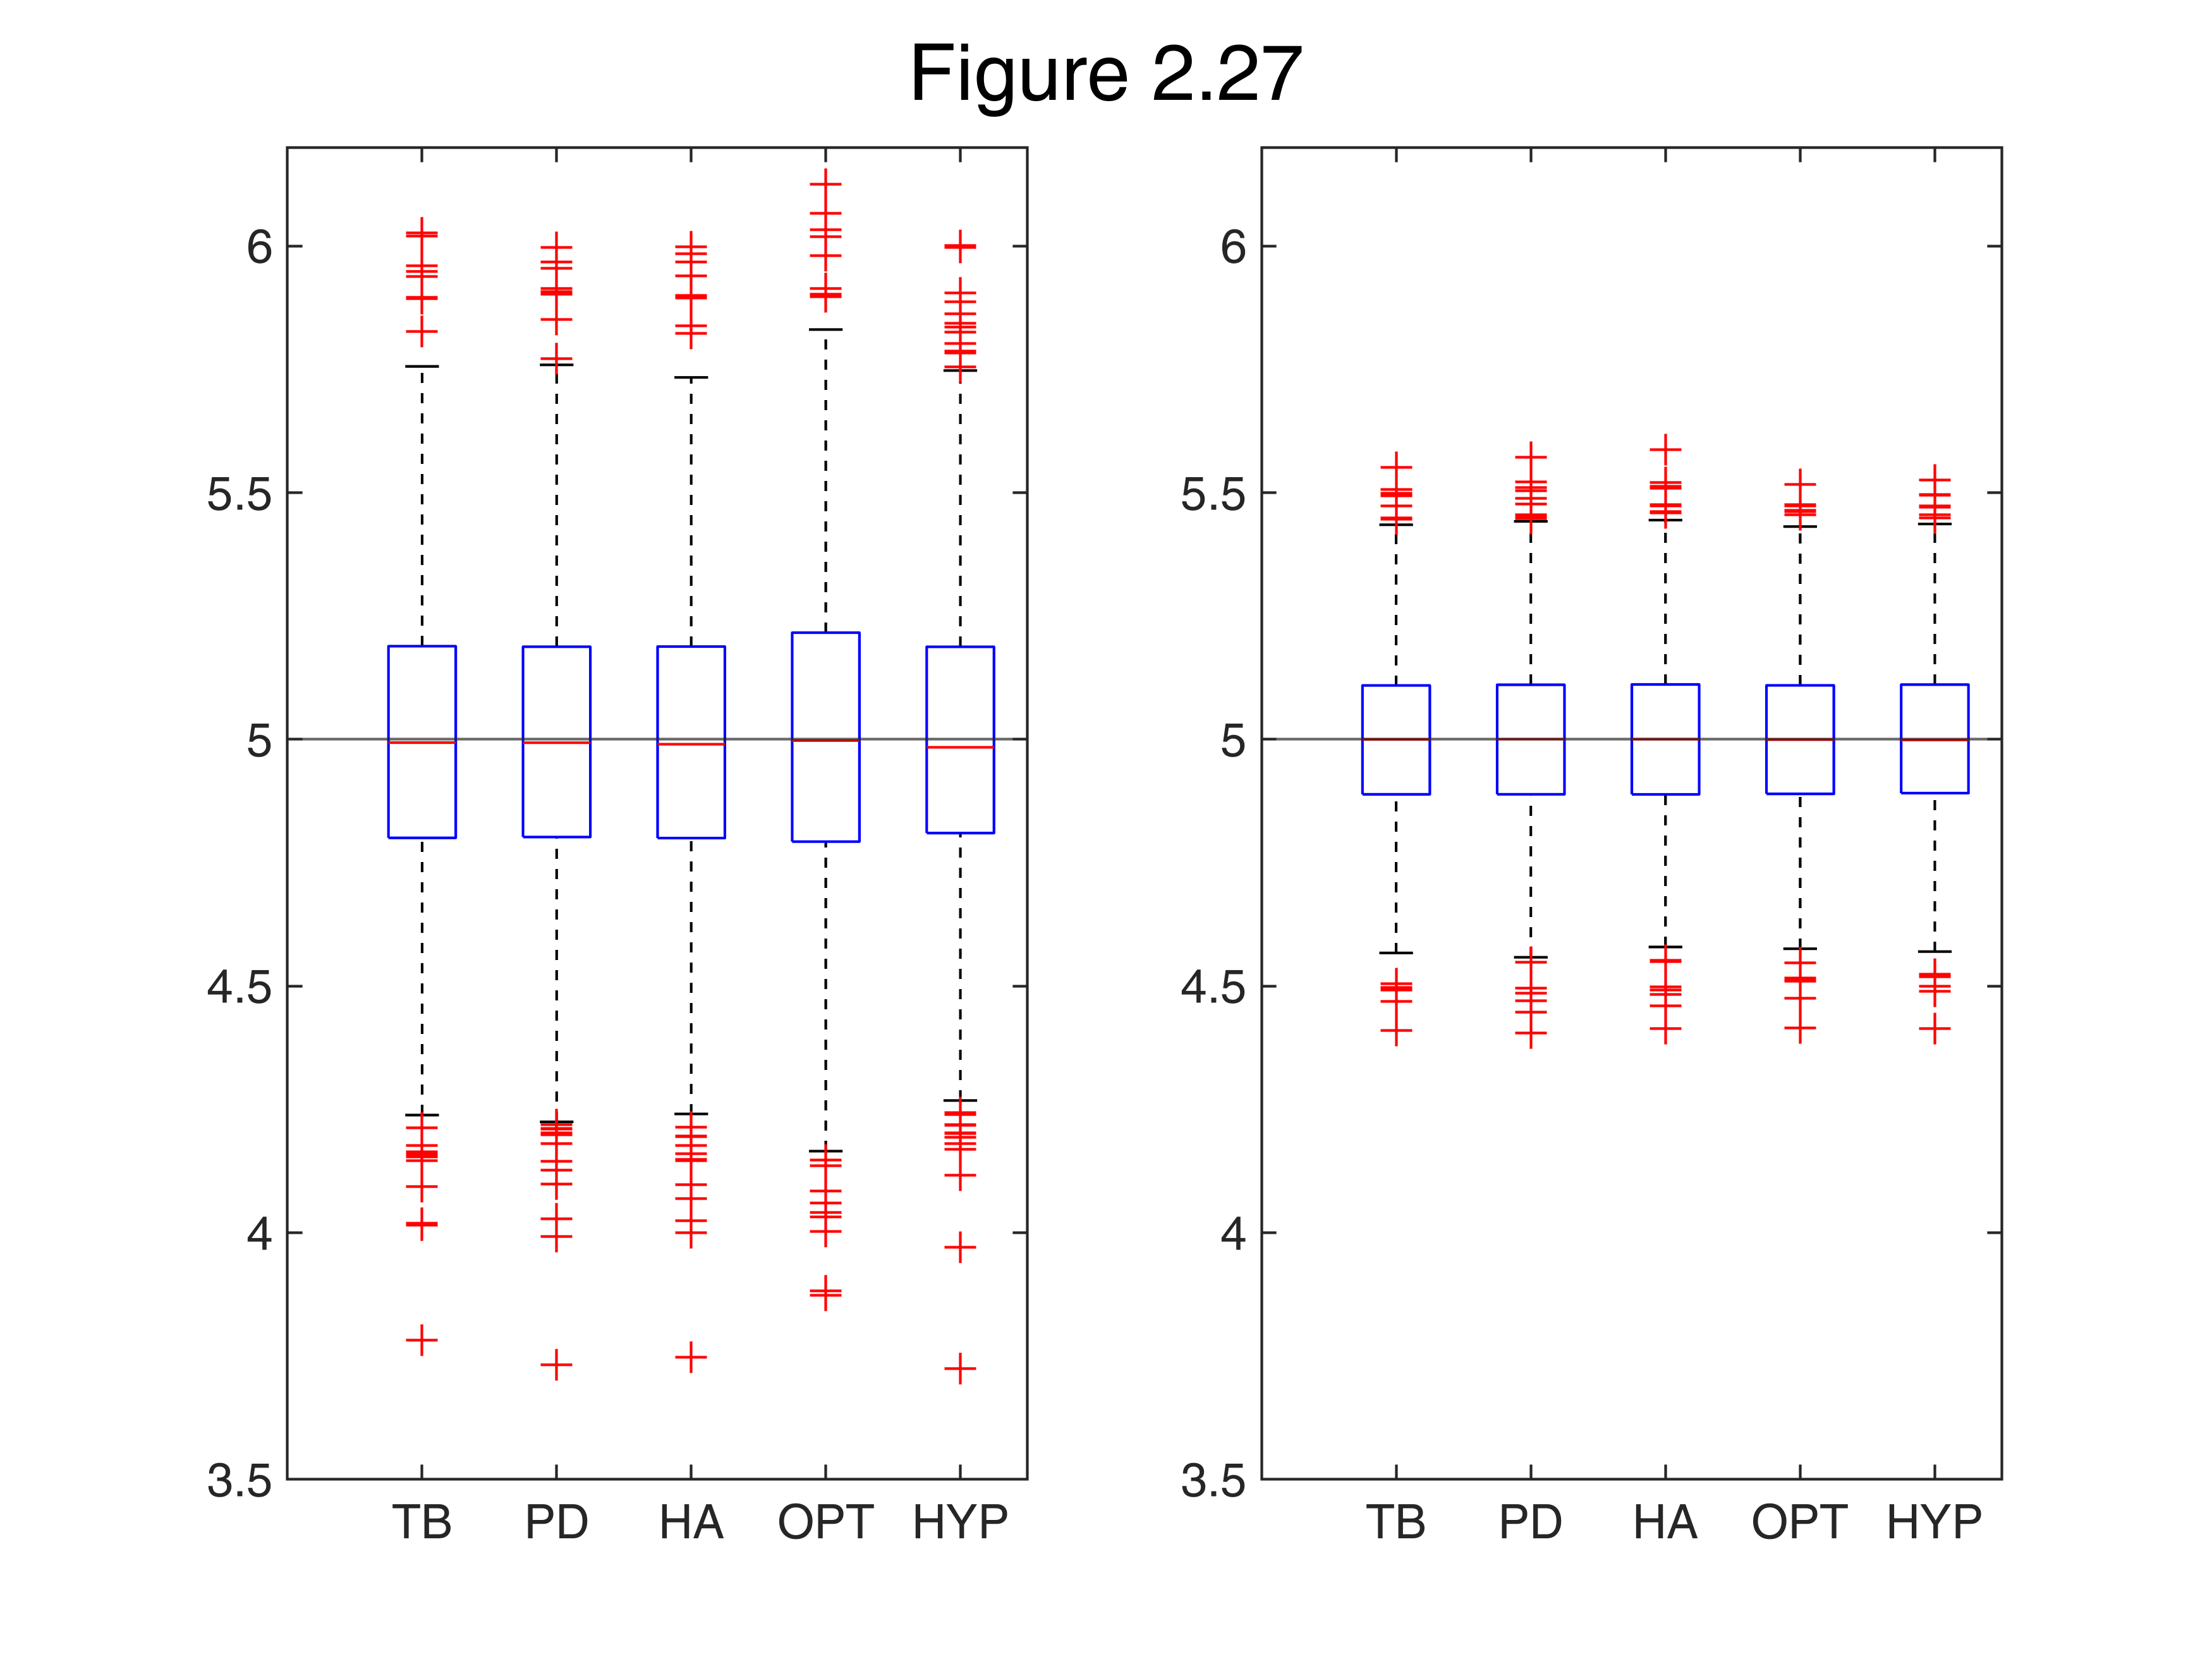

In [10]:
k=4.5;
rhoHYPsup=HYPrho(200000,[cHYP,k,A,B,d]);
% rhoHAsup=1;
psifuncHYP.c1=[cHYP,k,A,B,d];
% kc = E(rho) = sup(rho)*bdp
psifuncHYP.kc1=rhoHYPsup*bdp;

truescale=2;
trueloc=5;
shiftcontamination =1;
fraccontamination=0.15;
shift=20;
n=200;
rng(1000)
nsimul=2000;
Loc=zeros(nsimul,5);
usetruescale=1;
yl1=3.5;
yl2=6.2;

for j=1:nsimul

    u=truescale*randn(n,1)+trueloc;
    n1=round(n*fraccontamination);

    if shiftcontamination ==true
        % shift contamination
        u(1:n1)=u(1:n1)+shift;
    else
        % point mass contamination
        u(1:n1)=shift;
    end

    if usetruescale ==true
        mTB=Mlocation(u,psifuncTB,truescale);
        mPD=Mlocation(u,psifuncPD,truescale);
        mHA=Mlocation(u,psifuncHA,truescale);
        mOPT=Mlocation(u,psifuncOPT,truescale);
        mHYP=Mlocation(u,psifuncHYP,truescale);
    else
        mTB=Mlocation(u,psifuncTB);
        mPD=Mlocation(u,psifuncPD);
        mHA=Mlocation(u,psifuncHA);
        mOPT=Mlocation(u,psifuncOPT);
        mHYP=Mlocation(u,psifuncHYP);
    end

    % disp([s sPD])
    Loc(j,:)=[mTB mPD mHA mOPT mHYP];
end

fig=figure;
set(fig,'defaultLegendAutoUpdate','off');
subplot(1,2,1)
hold('on')

boxplot(Loc,'Labels',["TB" "PD" "HA" "OPT" "HYP"])
if addcaption ==true
    if fraccontamination==0
        title(['bdp= ' num2str(bdp) ' n=' num2str(n) ' fraccont=' num2str(fraccontamination) ' usetruescale=' num2str(usetruescale)])
    else
        title(['bdp= ' num2str(bdp) ' n=' num2str(n) ' fraccont=' num2str(fraccontamination), ' shiftcont=' num2str(shiftcontamination) ...
            ' shift=' num2str(shift) ' usetruescale=' num2str(usetruescale)])
    end
end

ylim([yl1 yl2])
yline(trueloc)

subplot(1,2,2)
hold('on')
% Now fix bdp to 0.15
bdp=0.15;
psifuncTB=struct;
psifuncTB.class='TB';
c=TBbdp(bdp,1);
% kc = E(rho) = sup(rho)*bdp
kc=c^2/6*bdp;
psifuncTB.c1=c;
psifuncTB.kc1=kc;

psifuncPD=struct;
psifuncPD.class='PD';
c1=PDbdp(bdp);
psifuncPD.c1=c1;
psifuncPD.kc1=bdp;

psifuncHA=struct;
psifuncHA.class='HA';
abc=[2;4;8];
% Compute tuning constant associated to the requested breakdown
% point
cHA=HAbdp(bdp,1,abc);
% kc = E(rho) = sup(rho)*bdp
psifuncHA.c1=cHA;
% kc = E(rho) = sup(rho)*bdp
psifuncHA.kc1=HArho(cHA*abc(3),[cHA; abc])*bdp;

psifuncOPT=struct;
psifuncOPT.class='OPT';
cOPT=OPTbdp(bdp,1); % /3;
rhoOPTsup=OPTrho(200000,1);
% rhoHAsup=1;
psifuncOPT.c1=cOPT;
% kc = E(rho) = sup(rho)*bdp
psifuncOPT.kc1=rhoOPTsup*bdp;

psifuncHYP=struct;
psifuncHYP.class='HYP';
[cHYP,A,B,d]=HYPbdp(bdp,1);
k=4.5;
rhoHYPsup=HYPrho(200000,[cHYP,k,A,B,d]);
% rhoHAsup=1;
psifuncHYP.c1=[cHYP,k,A,B,d];
% kc = E(rho) = sup(rho)*bdp
psifuncHYP.kc1=rhoHYPsup*bdp;

rng(1000)
Loc=zeros(nsimul,5);

for j=1:nsimul

    u=truescale*randn(n,1)+trueloc;
    n1=round(n*fraccontamination);

    if shiftcontamination ==true
        % shift contamination
        u(1:n1)=u(1:n1)+shift;
    else
        % point mass contamination
        u(1:n1)=shift;
    end

    if usetruescale ==true
        mTB=Mlocation(u,psifuncTB,truescale);
        mPD=Mlocation(u,psifuncPD,truescale);
        mHA=Mlocation(u,psifuncHA,truescale);
        mOPT=Mlocation(u,psifuncOPT,truescale);
        mHYP=Mlocation(u,psifuncHYP,truescale);
    else
        mTB=Mlocation(u,psifuncTB);
        mPD=Mlocation(u,psifuncPD);
        mHA=Mlocation(u,psifuncHA);
        mOPT=Mlocation(u,psifuncOPT);
        mHYP=Mlocation(u,psifuncHYP);
    end

    Loc(j,:)=[mTB mPD mHA mOPT mHYP];
end

boxplot(Loc,'Labels',["TB" "PD" "HA" "OPT" "HYP"])
if addcaption ==true
    if fraccontamination==0
        title(['bdp= ' num2str(bdp) ' n=' num2str(n) ' fraccont=' num2str(fraccontamination) ' usetruescale=' num2str(usetruescale)])
    else
        title(['bdp= ' num2str(bdp) ' n=' num2str(n) ' fraccont=' num2str(fraccontamination), ' shiftcont=' num2str(shiftcontamination) ...
            ' shift=' num2str(shift) ' usetruescale=' num2str(usetruescale)])
    end
end
ylim([yl1 yl2])
yline(trueloc)

if prin==1
    % print to postscript
    print -depsc rhoDiffbdpsKnown.eps;
else
    sgtitle('Figure 2.27')
    set(gcf,"Name",'Figure 2.27')
end

In [11]:

%InsideREADME